# Домашнее задание «Сохранение результатов эксперимента»

* Выполните задание по ссылке и оформите в виде CRISP-DM подхода.

* Структурируйте код, отчёт и файлы с данными на основе сегодняшней лекции.

* Загрузите решение в Git и пришлите ссылку на ваш репозиторий.

*Дополнительное задание*

Попробуйте не загружать CSV-файл с данными, а сделайте отдельный скрипт на его получение.

# 1. Business understanding(Бизнес-анализ)
Понимание вина и типов
Вино — алкогольный напиток, приготовленный из винограда, который ферментируется без добавления сахара, кислот, ферментов, воды или других питательных веществ.

Оценка качества вина в баллах помогает потребителю лучше понять характеристики вина и сравнить его с другими видами вин. Это также помогает производителям вин определить, насколько их продукт соответствует ожиданиям потребителей и какие улучшения могут быть внесены в производственный процесс.

Оценка качества вина в баллах является одним из способов создания стандартов качества для винодельческой отрасли и помогает улучшить качество вина в целом. В зависимости от того, кто является заказчиком данного иследования - производитель вина, торговая оргнаизация, конечный потребитель или орган стандартизации виндельческой отрасли, этот раздел может быть видоизменен

## 1.1. Determine Budiness Objectives (Определение бизнес-целей)

Цель - предсказать качество вина в баллах

## 1.2. Assess Situation (Оценка текущей ситуации)

Существует несколько методик оценки качества вина, которые используются профессиональными сомелье и винными экспертами. Некоторые из них включают:

1. Система оценки вина в баллах, где вино оценивается по шкале от 1 до 100 баллов на основе его аромата, вкуса, структуры и общей гармонии.

2. Методика дегустации, где вино оценивается по таким критериям, как цвет, аромат, вкус, структура и послевкусие.

3. Методика "треугольник" или "триангуляция", где эксперты оценивают три различных образца вина, один из которых отличается от других двух. Это позволяет выявить различия между винами и определить, какое из них является лучшим.

4. Методика "слепой дегустации", где эксперты оценивают вино без предварительной информации о его происхождении, сорте и цене. Это позволяет избежать предвзятости и сосредоточиться на качестве вина.

5. Методика "вертикальной дегустации", где эксперты оценивают несколько различных годовых выпусков одного и того же вина, чтобы выявить различия между ними и определить, какой годовой выпуск является лучшим.

Все перечисленные выше методики основываются на субъективных вкусовых предпочтениях экспертов. Ни одна из методик не предусматривает применение других характеристик вина, помимо указанных выше, при расчете балла качества. Это означает, что автоматизировать процесс определения качества вина практически невозможно, т.к не используются его объективные физико-химические характеристики. Данное исследование имеет целью решить эту проблему,обогатив признаки качества и позволив более точно оценить качество продукта по его характеристикам, благодаря чему станет возможным автоматическое прогнозирование.

##1.3. Determine Data Mining Goals (Определение целей аналитики)

Цель - получить модель, позволяющую прогнозировать качество различных сортов красных и белых вин в зависимости от их физико-химических характеристик

## 1.4. Product Project Plan ( Подготовка плана проекта)

[План реализации проекта](https://docs.google.com/document/d/1WDhOxFh0Mh53z7HydViANTGIBNrBLVeR6gLf_Q67yhc/edit)

# 2.Data Understanding (Анализ данных)

##2.1. Collect initial data (Сбор данных)

### 2.1.1. Импорт библиотек

In [ ]:
!apt-get install dotenv

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  dotenv
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 280 kB of archives.
After this operation, 831 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 dotenv amd64 0.15.0-2build1 [280 kB]
Fetched 280 kB in 1s (474 kB/s)
Selecting previously unselected package dotenv.
(Reading database ... 120895 files and directories currently installed.)
Preparing to unpack .../dotenv_0.15.0-2build1_amd64.deb ...
Unpacking dotenv (0.15.0-2build1) ...
Setting up dotenv (0.15.0-2build1) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
# Import libraries

# ignore warnings
import warnings
warnings.filterwarnings('ignore')
import json
import numpy as np # linear algebra
from numpy.random import seed
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from google.colab import files
from zipfile import ZipFile  # unzippung dataset
# Modelling algorithms
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn import model_selection, metrics
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.python.keras.utils.vis_utils import plot_model
import pydot

# Modelling helpers
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler # библиотека для нормализации номинальных признаков
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.feature_selection import RFECV
import scipy as sp
from scipy import stats as st # При работе со статистикой
from scipy.stats import shapiro
from scipy.stats import skew, norm, probplot, boxcox, f_oneway
# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
# Configure visualization
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 8, 6

###2.1.2. Пользовательские функции

In [ ]:
from IPython.core.display_trap import DisplayTrap
# User functions for visualisation
def plot_histograms(df: pd.DataFrame, variables: list, n_rows: int, n_cols: int) -> None:
  """Построение гистограмм признаков
  """
  fig = plt.figure(16, 12)
  for i, var_name in enumerate(variables):
    ax = fig.add_subplot(n_rows, n_cols, i + 1)
    df[var_name].hist(bins=10, ax=ax)
    ax.set_title("Skew:" + str(round(float(df[var_name].skew()),))) # Distribution of df[var_name]
    ax.set_xticklabels([], visible=False)
    ax.set_yticklabels([], visible=False)
  fig.tight_layout()
  plt.show()

def plot_distribution(df: pd.DataFrame, var: list, target: list, **kwargs) -> None:
  """Построение распределений признаков"""
  row = kwargs.get('row', None)
  col = kwargs.get('col', None)
  facet = sns.FacetGrid(df, hue=target, aspect=4, row=row, col=col)
  facet.map(sns.kdeplot, var, shade=True)
  facet.set(xlim=(0, df[var].max()))
  facet.add_legend()

def plot_categories(df: pd.DataFrame, cat: list, target: list, **kwargs) -> None:
  """Построение барплота для категориальных признаков"""
  row = kwargs.get('row', None)
  col = kwargs.get('col', None)
  facet = sns.FacetGrid(df, row=row, col=col)
  facet.map(sns.barplot, cat, target)
  facet.add_legend()

def plot_correlation_map(df: pd.DataFrame) -> None:
  """построение тепловой карты"""
  corr = df.corr()
  _, ax = plt.subplots(figsize=(12, 10))
  cmap = sns.diverging_palette(220, 10, as_cmap=True)
  _ = sns.heatmap(corr, cmap=cmap, square=True, cbar_kws={'shrink': .9},
                  ax=ax, annot=True, annot_kws={'fontsize':12})

def plot_bar(df:pd.DataFrame, var: str, title: str, axes_titles: list, x_label_title:str,
             y_label_title: str, colors: list) -> None:

  fig = plt.figure(figsize = (8, 4))
  title = fig.suptitle(title, fontsize=14)
  fig.subplots_adjust(top=0.85, wspace=0.3)
  n_cols = len(axes_titles)
  vars = df['type'].unique()
  for i, var_name in enumerate(axes_titles):
    ax = fig.add_subplot(1, n_cols, i + 1)
    ax.set_title(var_name)
    ax.set_xlabel(x_label_title)
    ax.set_ylabel(y_label_title)
    rw_q = df[var][df.type == vars[i]].value_counts()
    rw_q = (list(rw_q.index), list(rw_q.values))
    ax.set_ylim([0, 2500])
    ax.tick_params(axis='both', which='major', labelsize=8.5)
    bar = ax.bar(rw_q[0], rw_q[1], color=colors[i], edgecolor='black', linewidth=1)

def draw_plot(X, names, type):
  """
  служебная функция для визуализации распределения признаков,
  построения боксплотов и графиков квантиль - квантиль.
  помогает визуально оценить нормальность распределения и
  наличие выбросов
  """
  n= len(names)
  seed(1)
  f, ax = plt.subplots(nrows=1, ncols=n, figsize=(22,2))
  i=0
  for key, value in names.items():
    if type == 'distplot':
      distplot = sns.distplot(x=X[key],  ax=ax[i])
      distplot.set_xlabel('', fontsize=8)
      distplot.set_ylabel('', fontsize=8)
    elif type == 'boxplot':
      boxplot = sns.boxplot(x=X[key],  ax=ax[i])
      boxplot.set_xlabel('', fontsize=8)
      boxplot.set_ylabel('', fontsize=8)
    elif type == 'qqplot':
       qq = qqplot(data=X[key], line='s', ax=ax[i])

    elif type == 'lineplot':
      lineplot = sns.lineplot(x=X[key], palette="tab10", linewidth=2.5, ax=ax[i])
      lineplot.set_xlabel('', fontsize=8)
      lineplot.set_ylabel('', fontsize=8)
    else:
      pass
    ax[i].set_title(value, fontsize=8)
    ax[i].minorticks_on()

    #  Определяем внешний вид линий основной сетки:
    ax[i].grid(which='major',
        color = 'r',
        linestyle = '-')

    #  Определяем внешний вид линий вспомогательной
    #  сетки:
    ax[i].grid(which='minor',
        color = 'k',
        linestyle = ':')

    i+=1

def get_transform(X, num_features):
  """
  Служебная функция для визуализации распределения числовых признаков
  после различной трансформации
  """
  for feature in num_features:

    X_tmp=X[feature]

    distributions = [
        (f"{feature}: Unscaled data", X_tmp),\
        (f"{feature}: standard",
        StandardScaler().fit_transform(X_tmp.to_numpy().reshape(-1,1))),

        (f"{feature}: min-max", \
        MinMaxScaler().fit_transform(X_tmp.to_numpy().reshape(-1,1))),

        (f"{feature}: max-abs", \
        MaxAbsScaler().fit_transform(X_tmp.to_numpy().reshape(-1,1))),

        (f"{feature}: robust", \
        RobustScaler(quantile_range=(25, 75)).fit_transform(X_tmp.to_numpy().reshape(-1,1))),

        (f"{feature}: power tr. (Yeo-Johnson)", \
        PowerTransformer(method="yeo-johnson").fit_transform(X_tmp.to_numpy().reshape(-1,1))),

        (f"{feature}: quantile tr.uniform",
            QuantileTransformer(output_distribution="uniform").fit_transform(X_tmp.to_numpy().reshape(-1,1)),
        ),
        (f"{feature}: quantile tr. gaussian",
            QuantileTransformer(output_distribution="normal").fit_transform(X_tmp.to_numpy().reshape(-1,1)),
        ),
        (f"{feature}: L2 normalizing", Normalizer().fit_transform(X_tmp.to_numpy().reshape(-1,1))),
    ]
    dist_dict={}
    for item in distributions:
      dist_dict[item[0]]=item[0]

    transform_results = pd.DataFrame(list(zip(
                                              distributions[0][1],
                                              distributions[1][1],
                                              distributions[2][1],
                                              distributions[3][1],
                                              distributions[4][1],
                                              distributions[5][1],
                                              distributions[6][1],
                                              distributions[7][1],
                                              distributions[8][1],

                                        )),
                                    columns = [
                      distributions[0][0],
                      distributions[1][0],
                      distributions[2][0],
                      distributions[3][0],
                      distributions[4][0],
                      distributions[5][0],
                      distributions[6][0],
                      distributions[7][0],
                      distributions[8][0],


                                            ])
  # визуализация распределения признака  после  трансформации
    draw_plot(transform_results, dist_dict, 'distplot')



# User functions for inference statistcs

def type_inf_stat_test(feature):
    F, p = f_oneway(df[df.type == 'red'][feature],
                    df[df.type == 'white'][feature])
    if p <= 0.05:
        msg = 'Reject'
    else:
        msg = 'Accept'
    print('{}: F Statistic: {:.2f} \tp-value: {:.3f} \tNull Hypothesis: {}'.format(feature, F, p, msg))

def quality_inf_stat_test(feature):
    F, p = f_oneway(df[df.quality_label == 'low'][feature],
                    df[df.quality_label == 'medium'][feature],
                    df[df.quality_label == 'high'][feature])
    if p <= 0.05:
        msg = 'Reject'
    else:
        msg = 'Accept'
    print('{}: F Statistic: {:.2f} \tp-value: {:.3f} \tNull Hypothesis: {}'.format(feature,F, p, msg))


def shapiro_test(df,names):
    """
    Служебная функция для вывода информации по тесту Шапиро-Уилкса
    """
    for name in names:
        stat, p = shapiro(df[name])
        print(name)
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        alpha = 0.05
        if p > alpha:
            print('Предположительно нормальное распределение (Недостаточно данных, чтобы отвергнуть H0)')
        else:
            print('Отвергаем H0 о нормальности распределения')
        print()

def describe_more(df: pd.DataFrame) -> None:
  """ """
  var = []
  l = []
  t = []
  for x in df:
    var.append(x)
    l.append(len(pd.value_counts(df[x])))
    t.append(df[x].dtypes)
    levels = pd.DataFrame({'Variable': var, 'Levels': l, 'Datatype': t})
    levels.sort_values(by='Levels', inplace=True)

def plot_model_var_imp(model, X, y) -> None:
  """Сортировка признаков по важности"""
  imp = pd.DataFrame(model.feature_importances_,
                     columns=['Importance'],
                     index=X.columns)
  imp = imp.sort_values(['Importance'], ascending=True)
  imp[:10].plot(kind='barh')
  print(model.score(X,y))

def sigma_3(tmp,names, percent):
  """
  Служебная функция для поиска выбросов признака по правилу 3 сигм
  при нормальном или близком к ноормальному распределению
  tmp - датасет
  names - названия признаков
  percent - допустимый процент выбросов
  Возвращает % выбросов и их индексы
  """
  outliner_results=[]

  for name in names:
    start_len = tmp.shape[0]
    result=dict()
    indices=[]
    std = tmp[name].std()
    mean = tmp[name].mean()
    left_board = mean - 3 * std
    right_board  = mean + 3 * std
    indices = tmp.loc[(tmp[name]<=left_board) | (tmp[name]>=right_board)].index.to_list()   # Это выбросы
    share = len(indices)/start_len*100
    # result['feature']=name
    result['indices']=indices
    # result['share'] = share
    outliner_results.append(result)

  indices = set()
  for item in outliner_results:
    indices = indices.union(item['indices']) # объединяем выбросы по всем признакам
  share = (len(indices))/start_len * 100
  # возвращает % выбросов, множество индексов выбросов

  return share, indices

def interquartile_range(tmp,names,percent):
  """
  Служебная функция для поиска выбросов признака по межквартильному размаху IQR
  при нормальном или близком к ноормальному распределению
  tmp - датасет
  names - названия признаков
  percent - допустимый процент выбросов
  Возвращает % выбросов и их индексы
  """
  outliner_results=[]
  start_len = len(tmp)

  for name in names:
    result=dict()
    q1 = tmp[name].quantile(0.25)
    q3 = tmp[name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    indices = tmp.loc[(tmp[name]<=lower_bound) | (tmp[name]>=upper_bound)].index.to_list()
    share = len(indices)/start_len*100
    # result['feature']=name
    result['indices']=indices
    # result['share'] = share
    outliner_results.append(result)

  indices = set()
  for item in outliner_results:
    indices = indices.union(item['indices'])
  share = (len(indices))/start_len * 100

  return share, indices

def percentile_range(tmp,names,percent):
  """
  Служебная функция для поиска выбросов признака за пределами диапазона
  процентилей (0.5, 99.5)
    tmp - датасет
  names - названия признаков
  percent - допустимый процент выбросов
  Возвращает % выбросов и их индексы
  """
  outliner_results=[]
  start_len = len(tmp)

  for name in names:
    result=dict()
    lower_limit, upper_limit = np.percentile(a=tmp[name], q=[0.5, 99.5])

    indices = tmp.loc[(tmp[name]<=lower_limit) | (tmp[name]>=upper_limit)].index.to_list()
    share = len(indices)/start_len*100
    # result['feature']=name
    result['indices']=indices
    # result['share'] = share
    outliner_results.append(result)

  indices = set()
  for item in outliner_results:
    indices = indices.union(item['indices'])
  share = (len(indices))/start_len * 100

  return share, indices

def mahalanobis(x= None , data= None , cov= None ):
  """
  Функция для расчета расстояния Maхаланобиса
  Расстояние Махаланобиса — это расстояние между двумя точками в
  многомерном пространстве. Оно часто используется для поиска выбросов
  в статистическом анализе, включающем несколько переменных
  https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%9C%D0%B0%D1%85%D0%B0%D0%BB%D0%B0%D0%BD%D0%BE%D0%B1%D0%B8%D1%81%D0%B0
  """
  x_mu = x - np.mean(data)
  if not cov:
    cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(x_mu, inv_covmat)
    mahal = np.dot(left, x_mu.T)
  return mahal.diagonal()


def make_login():
  load_dotenv("/content/.env")
  settings = Settings()
  user_name = settings.USERNAME
  key = settings.KEY
  # создаем словарь с данными для файла kaggle.json
  kaggle_info = {
      "username": user_name,
      "key": key}

  # преобразуем словарь в строку JSON
  json_info = json.dumps(kaggle_info)

  # создаем файл kaggle.json и записываем в него строку JSON
  with open(os.path.expanduser("~/.kaggle/kaggle.json"), "w") as f:
      f.write(json_info)


def make_dataset(file_path: str, zip_name: str, file_name: str) -> pd.DataFrame:
  """Функция для скачивания и распаковки датасета с kaggle
  """
  # Загрузка файла аутентификации
  kaggle.api.authenticate()

  # Установка пути для загрузки данных
  data_path = os.path.join(os.getcwd(), 'data')
  os.makedirs(data_path, exist_ok=True)

  # Скачивание данных по ссылке
  kaggle.api.dataset_download_files(file_path, path=data_path)
  with ZipFile(zip_name, 'r') as zip_file:  # Распаковываем архив в сессионное хранилище в папку archiv.
     zip_file.extractall(data_path)
  df = pd.read_csv(Path(data_path,file_name))
  return df


def clean_data(df: pd.DataFrame) -> pd.DataFrame:
  """Удаление пропусков, удаление дубликатов
  Args: df: pd.DataFrame
  Return: df: pd.DataFrame"""
  d = df[(pd.isnull(df['fixed acidity'])|
        pd.isnull(df['pH'])|
        pd.isnull(df['volatile acidity'])|
        pd.isnull(df['sulphates'])|
        pd.isnull(df['citric acid'])|
        pd.isnull(df['residual sugar'])|
        pd.isnull(df['chlorides']))
        ]
  if len(d)/df.shape[0]*100 <5:
    df = df[~(pd.isnull(df['fixed acidity'])|
        pd.isnull(df['pH'])|
        pd.isnull(df['volatile acidity'])|
        pd.isnull(df['sulphates'])|
        pd.isnull(df['citric acid'])|
        pd.isnull(df['residual sugar'])|
        pd.isnull(df['chlorides']))
        ]
    df.drop_duplicates(inplace=True)
    return df

def train_model(df: pd.DataFrame, random_seed: int,  model):
  """
  Служебная функция. выполняет:
    - разделение на Train и test
    - обучение модели
    df- датафрейм, random_seed - фиксатор генератора случ.чисел,
    model - модель классификатора,
  """


  X = df.drop(columns=['type'])
  y = df['type']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

  rf = model
  rf.fit(X_train, y_train)

  return X,y, X_test, y_test, rf


  def get_labels(data: pd.DataFrame) -> tuple:
    """ Получение из общего датасета меток type и quality"""
    type_wine = data.pop('type')
    type_wine = np.array(type_wine)
    quality = data.pop('quality')
    quality = np.array(quality)
    return (quality, type_wine)


def make_model() :
  # Строим модель CNN нейросети с двумя выходами
  # Вход - по числу признаков
  inputs = tf.keras.layers.Input(shape=(11,))
  # Полносвязные слои для созлания нелинейности
  x = Dense(units=32, activation='relu')(inputs)
  x = Dense(units=32, activation='relu')(x)

  # Выход для определения типа вина (бинарная классификация)
  y_t_layer = Dense(units = 1, activation='sigmoid', name='y_t_layer')(x)

  #Еще один полносвязный уровень для последующего добавления выхода по качеству (x)
  quality_layer=Dense(units=64, name='quality_layer', activation='relu')(x)

  # Выход для опеделения качества (регрессия)
  y_q_layer = Dense(units=1, name='y_q_layer')(quality_layer)

  model = Model(inputs=inputs, outputs=[y_q_layer, y_t_layer])

  optimizer = tf.keras.optimizers.Adam()

  #Для каждого выхода - свои метрики и функции потерь

  model.compile(optimizer=optimizer,
                loss = {'y_t_layer' : 'binary_crossentropy',
                        'y_q_layer' : 'mean_squared_error'
                      },
                metrics = {'y_t_layer' : 'accuracy',
                          'y_q_layer': [tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.MeanSquaredError(), tf.keras.metrics.MeanAbsoluteError()]
                        }
              )
  return model


def main():
  random_seed = 42
  results = dict()
  df = make_dataset('rajyellow46/wine-quality', 'data/wine-quality.zip', 'winequalityN.csv')
  df = clean_data(df)
  data, data_reg = build_features(df)
  rf = RandomForestClassifier(criterion='entropy',random_state=random_seed)
  X, y, X_test, y_test, rf = train_model(data, random_seed, rf)
  results['baseline'] = eval_model(X, y, X_test, y_test, random_seed, rf, flag=True)
  model = make_model()


### 2.1.3. Загрузка данных

In [ ]:
# kaggle installing
!pip install -q kaggle

In [ ]:
# Data loading
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [ ]:
# Load my kaggle.json data
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
# make directory  .caggle to upload kaggle.json
! mkdir ~/.kaggle

In [ ]:
# upload kaggle.json into this directory
! cp kaggle.json ~/.kaggle/

In [ ]:
# make kaggle.json secret
! chmod 600 /root/.kaggle/kaggle.json


In [ ]:
# Get a list of wine-quality datasets
# !kaggle datasets list -s 'wine-quality'


In [ ]:
#This is my dataset to download
!kaggle datasets download -d 'rajyellow46/wine-quality'

  0% 0.00/98.0k [00:00<?, ?B/s]
100% 98.0k/98.0k [00:00<00:00, 101MB/s]


In [ ]:
with ZipFile('/content/wine-quality.zip', 'r') as zip_file:  # Распаковываем архив в сессионное хранилище в папку archiv.
     zip_file.extractall()

In [ ]:
df = pd.read_csv('/content/winequalityN.csv')

In [ ]:
df.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

Вместо всех манипуляций выше - одна функция make_dataset

In [ ]:
def make_dataset(file_path: str, zip_name: str, file_name: str) -> pd.DataFrame:
  """Функция для скачивания и распаковки датасета с kaggle
  """
  import os
  import kaggle
  from pathlib import Path

  # Загрузка файла аутентификации
  kaggle.api.authenticate()

  # Установка пути для загрузки данных
  data_path = os.path.join(os.getcwd(), 'data')
  os.makedirs(data_path, exist_ok=True)

  # Скачивание данных по ссылке
  kaggle.api.dataset_download_files(file_path, path=data_path)
  with ZipFile(zip_name, 'r') as zip_file:  # Распаковываем архив в сессионное хранилище в папку archiv.
     zip_file.extractall(data_path)
  df = pd.read_csv(Path(data_path,file_name))
  return df

In [ ]:
from dotenv import load_dotenv
from settings import Settings

In [ ]:
df = make_dataset('rajyellow46/wine-quality', 'data/wine-quality.zip', 'winequalityN.csv')
df.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

##2.2. Describе Data (Описание данных)

### Информация о наборе данных:


Набор данных был загружен из репозитория машинного обучения UCI.

Два набора данных относятся к красному и белому вариантам португальского вина Винью Верде. Из соображений конфиденциальности и логистики доступны только физико-химические (входные) и сенсорные (выходные) переменные (например, нет данных о сортах винограда, марке вина, отпускной цене вина и т. д.).

Эти наборы данных можно рассматривать как задачи классификации или регрессии. Классы упорядочены и не сбалансированы (например, нормальных вин намного больше, чем отличных или плохих). Алгоритмы обнаружения выбросов можно использовать для обнаружения нескольких отличных или плохих вин.

Два набора данных были объединены, и несколько значений были удалены случайным образом.
Входные данные
* 0 - type  - тип вина ( 'white', 'red')
* 1 - fixed acidity - фиксированная кислотность
* 2 - volatile acidity - летучая кислотность
* 3 - citric acid - лимонная кислота
* 4 - residual sugar - остаточный сахар
* 5 - chlorides - хлориды
* 6 - free sulfur dioxide - свободный диоксид серы
* 7 - total sulfur dioxide - общий диоксид серы
* 8 - density - плотность
* 9 - pH
* 10 - sulphates - сульфаты
* 11 - alcohol - крепость
Выходные данные (основаны на сенсорных данных, т. на субъективном восприятии дегустатора):
12 - quality (score between 0 and 10) - качество ( по шкале от 1 до 10)

**Понимание типов вина**

Красное вино изготавливается из темно-красного и черного винограда. Цвет обычно варьируется от различных оттенков красного, коричневого и фиолетового. Его производят из цельного винограда, включая кожицу, которая придает красным винам цвет и аромат, придавая им насыщенный вкус.

Белое вино производится из белого винограда без кожуры и косточек. Цвет обычно соломенно-желтый, желто-зеленый или желто-золотой. Большинство белых вин имеют легкий и фруктовый вкус по сравнению с более насыщенными красными винами.

**Понимание атрибутов и свойств вина**

*Кислотность*

Кислотность является одним из основных свойств вина и в значительной степени влияет на вкус вина. Кислотность в еде и напитках делает вкус терпким и пикантным. Кислотность на вкус также иногда путают с алкоголем. Вина с более высокой кислотностью кажутся более легкими, потому что они кажутся «пряными». Значительное снижение кислотности может привести к ухудшению вкуса вина. Если вы предпочитаете более богатое и округлое вино, вам понравится немного меньшая кислотность.
Ощущение покалывания, которое концентрируется на передней и боковых частях языка. Если вы потрете языком нёбо, появится ощущение шероховатости.
Ваш рот становится влажным, как будто вы откусили яблоко.

*Показатели, характеризующие кислотность*

*фиксированная кислотность*: фиксированные кислоты включают винную, яблочную, лимонную и янтарную кислоты, которые содержатся в винограде (кроме янтарной). Эта переменная обычно выражается в г(винной кислоты)/дм3.

*летучая кислотность*: эти кислоты необходимо удалить из вина перед завершением производственного процесса. Он в основном состоит из уксусной кислоты, хотя могут также присутствовать и другие кислоты, такие как молочная, муравьиная и масляная кислоты. Избыток летучих кислот нежелателен и приводит к неприятному привкусу. В США юридические пределы летучей кислотности составляют 1,2 г/л для красного столового вина и 1,1 г/л для белого столового вина. Летучую кислотность выражают в г(уксусной кислоты)/дм3.

*лимонная кислота*: Это одна из фиксированных кислот, которая придает вину свежесть. Обычно большая его часть расходуется в процессе брожения, а иногда добавляется отдельно, чтобы придать вину больше свежести. Обычно это выражается в г/дм3.

*pH*: также известный как водородный потенциал. Это числовая шкала, позволяющая определить кислотность или основность вина. Фиксированная кислотность в наибольшей степени влияет на pH вина. Возможно, вы знаете, что растворы с pH менее 7 являются кислыми, а растворы с pH выше 7 — щелочными. Чистая вода с pH 7 нейтральна. Большинство вин имеют pH от 2,9 до 3,9 и поэтому являются кислыми.

*Сладость*

Насколько вино сладкое или сухое (не сладкое)? Наше человеческое восприятие сладкого начинается с кончика языка. Зачастую самое первое впечатление о вине — это его сладость. Чтобы попробовать сладкое, сосредоточьте свое внимание на вкусовых рецепторах на кончике языка. Ваши вкусовые рецепторы покалывают? Это показатель сладости. Многие сухие вина могут иметь легкую сладость, которая делает их более полнотелыми.

Как почувствовать сладость вина

Ощущение покалывания на кончике языка.
Легкое ощущение маслянистости в середине языка, которое сохраняется.
Вино имеет более высокую вязкость; вино медленно стекает по стеклу. (также показатель высокой крепости)
Сухие красные вина, такие как Каберне Совиньон, часто содержат до 0,9 г/л остаточного сахара (обычно для дешевых вин).
Сухое вино часто можно спутать с вином с высоким содержанием танинов.

*Мера сладости*:

*остаточный сахар*: обычно это относится к натуральному сахару из винограда, который остается после остановки или прекращения процесса ферментации. Обычно это выражается в г/дм3.

*Содержание солей*

Содержание солей не является распространенным в описании вина. То, что это также не является положительным моментом, вероятно, само собой разумеется. Но тот факт, что в странах-производителях вина естьустановленные законом максимальные значения содержания хлорида натрия в вине, должен вам о чем-то сказать. Засоленность является проблемой в засушливых регионах, где частое орошение увеличивает засоленность почвы, что увеличивает засоленность вина. Состав почвы часто не соответствует составу винограда так, как вы ожидаете; соль, к сожалению, является исключением.

*хлориды*: концентрация хлоридов в вине зависит от терруара, и их самые высокие уровни наблюдаются в винах, происходящих из стран, где орошение осуществляется соленой водой или в районах с солоноватой местностью. Обычно это является основной причиной солености вина. Обычно выражается в г(хлорида натрия)/дм3.

*Сульфиты*: химические соединения (диоксид серы или SO2), которые в той или иной степени присутствуют в природе во всех типах вина. Диоксид серы естественным образом содержится в винах и является побочным продуктом брожения, но большинство виноделов предпочитают добавлять его немного больше, чтобы предотвратить рост нежелательных дрожжей и микробов, а также для защиты от окисления.Это антиоксидант, сохраняющий вино свежим и незапятнанным кислородом.


Было отмечено, что очень чувствительные дегустаторы чувствуют запах соединений серы в вине, хотя соединения серы несколько не связаны с сульфитами. Соединения серы в вине, называемые тиолами, варьируются по вкусу от цитрусовых до запахов приготовленных яиц.

Интересно то, что чем теплее вино, тем больше молекулярной серы оно выделяет. Вот почему некоторые вина имеют неприятный аромат вареных яиц, когда их открываешь. Вы можете решить эту проблему, декантировав вино и охладив его примерно на 15–30 минут.

Сколько серы в вине?

Винам с более низкой кислотностью требуется больше сульфитов, чем винам с более высокой кислотностью. При pH 3,6 и выше вина гораздо менее стабильны, и для их хранения необходимы сульфиты.
Винам с более ярким цветом (т. е. красным винам), как правило, требуется меньше сульфитов, чем прозрачным винам (т. е. белым винам). Типичное сухое белое вино может содержать около 100 мг/л, тогда как типичное сухое красное вино — около 50–75 мг/л.
Винам с более высоким содержанием сахара, как правило, требуется больше сульфитов, чтобы предотвратить вторичное брожение оставшегося сахара.
Вина с более высокой температурой выделяют свободные соединения серы (неприятный запах серы), и их можно «исправить» просто путем декантации и охлаждения вина.

Мера содержания солей серы:

*Сульфаты*: это минеральные соли, содержащие серу. Сульфаты для вина — то же самое, что глютен для еды. Они являются неотъемлемой частью виноделия во всем мире и считаются незаменимыми. Они связаны с процессом брожения и влияют на аромат и вкус вина. Здесь оно выражено в г(сульфат калия)/дм3.

*свободный диоксид серы*: это часть диоксида серы, которая при добавлении в вино считается свободной после того, как оставшаяся часть связывается. Виноделы всегда будут стараться получить как можно большую долю свободной серы для связывания. Они также известны как сульфиты, и их слишком большое количество нежелательно и дает резкий запах. Эта переменная выражается в мг/дм3.

*Общий диоксид серы*: это общая сумма связанного и свободного диоксида серы ( SO2 ). В основном его добавляют для уничтожения вредных бактерий и сохранения качества и свежести. Обычно существуют законодательные ограничения на содержание серы в винах, и ее избыток может даже убить хорошие дрожжи и вызвать нежелательный запах.Здесь это выражено в мг/дм3.

*Алкоголь*

Спирт образуется в результате превращения дрожжами сахара в процессе брожения. Процент алкоголя может варьироваться от вина к вину. Мы интерпретируем алкоголь, используя множество различных вкусовых рецепторов, поэтому он может иметь одновременно горький, сладкий, пряный и маслянистый вкус. Ваша генетика на самом деле играет роль в том, насколько горький или сладкий вкус алкоголя. Тем не менее, мы все можем ощущать алкоголь в задней части рта, в горле, как ощущение тепла.

Характеристики алкоголя:

Вина с более высоким содержанием алкоголя имеют более насыщенный и маслянистый вкус.
Вина с низким содержанием алкоголя имеют более легкий вкус.
Алкогольная мера:обычно измеряется в объемных % или в спирте по объему (ABV).

*Тело*

Вам хочется легкого, среднего или полнотелого вина? Тело зависит от многих факторов: от сорта вина, его происхождения, урожая, уровня алкоголя и способа его производства. Тело — это снимок общего впечатления от вина. Вы можете улучшить свой навык, обращая внимание на то, где и когда он присутствует.

*Мера - Плотность*: это можно представить как сравнение веса определенного объема вина с эквивалентным объемом воды. Обычно его используют как меру превращения сахара в спирт. Здесь это выражено в gcm3

In [ ]:
df.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

## 2.3. Explore Data (Изучение данных)

In [ ]:
# Типы признаков, К-во пропусков
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


12 числовых и 1 категориальный признак

In [ ]:
num_features_dict=dict()
num_features_names = df.drop(columns=['type']).columns.tolist()
for item in num_features_names:
  num_features_dict[item] = item
num_features_dict

{'fixed acidity': 'fixed acidity',
 'volatile acidity': 'volatile acidity',
 'citric acid': 'citric acid',
 'residual sugar': 'residual sugar',
 'chlorides': 'chlorides',
 'free sulfur dioxide': 'free sulfur dioxide',
 'total sulfur dioxide': 'total sulfur dioxide',
 'density': 'density',
 'pH': 'pH',
 'sulphates': 'sulphates',
 'alcohol': 'alcohol',
 'quality': 'quality'}

In [ ]:
# ключевая информация по признакам
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6487.000000       6489.000000  6494.000000     6495.000000   
mean        7.216579          0.339691     0.318722        5.444326   
std         1.296750          0.164649     0.145265        4.758125   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6495.000000          6497.000000           6497.000000  6497.000000   
mean      0.056042            30.525319            115.744574     0.994697   
std       0.035036            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6488.000000  6493.000000  6497.000000  6497.000000  
mean      3.218395     0.531215    10.491801     5.818378  
std       0.160748     0.148814     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [ ]:
# Target - переменная quality : 7 классов, сильный дисбаланс классов
df["quality"].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [ ]:
# категориальный признак type - также дисбаланс
df.groupby(["type"]).count()

fixed acidity  volatile acidity  citric acid  residual sugar  \
type                                                                  
red             1597              1598         1598            1599   
white           4890              4891         4896            4896   

       chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
type                                                                         
red         1599                 1599                  1599     1599  1597   
white       4896                 4898                  4898     4898  4891   

       sulphates  alcohol  quality  
type                                
red         1597     1599     1599  
white       4896     4898     4898

In [ ]:
# Посмотрим отдельно на признаки для красного и белого вин
df[df['type']=='red'].describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1597.000000       1598.000000  1598.000000     1599.000000   
mean        8.322104          0.527738     0.271145        2.538806   
std         1.740767          0.179085     0.194744        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1597.000000  1597.000000  1599.000000  1599.000000  
mean      3.310864     0.658078    10.422983     5.636023  
std       0.154290     0.169594     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [ ]:
df[df['type']=='white'].describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4890.000000       4891.000000  4896.000000     4896.000000   
mean        6.855532          0.278252     0.334250        6.393250   
std         0.843808          0.100811     0.120985        5.072275   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4896.000000          4898.000000           4898.000000  4898.000000   
mean      0.045778            35.308085            138.360657     0.994027   
std       0.021850            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4891.000000  4896.000000  4898.000000  4898.000000  
mean      3.188203     0.489835    10.514267     5.877909  
std       0.151014     0.114147     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

Основные моменты из описательной статистики, приведенной выше:

Среднее содержание остаточного сахара и общего содержания диоксида серы в белом вине, по-видимому, намного выше, чем в красном вине.

Среднее значение сульфатов, фиксированной кислотности и летучей кислотности, по-видимому, выше в красном вине по сравнению с белым вином.
Лимонной кислоты больше в белых винах, чем в красных.
Как правило, в белых винах концентрация хлоридов вдвое меньше, чем в красных винах.

In [ ]:
# сформируем вектор признаков
X = df.drop(columns=['type'])
X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

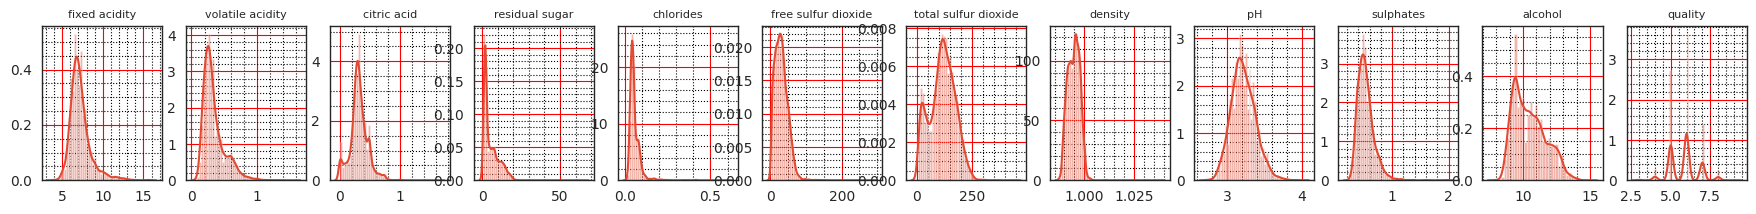

In [ ]:
# Распределение
draw_plot(X, num_features_dict, 'distplot')

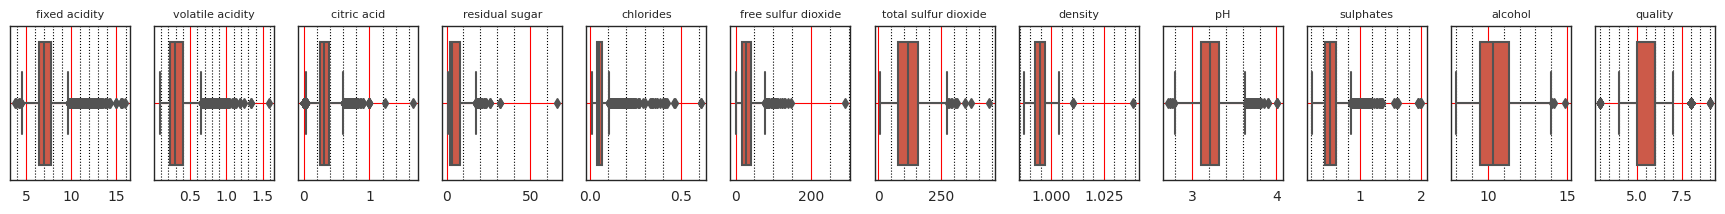

In [ ]:
# выбросы
draw_plot(X, num_features_dict, 'boxplot')

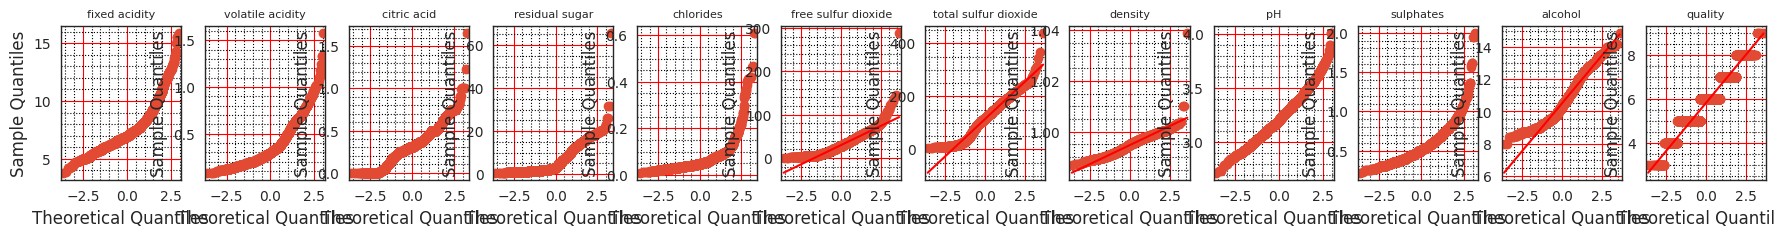

In [ ]:
draw_plot(X, num_features_dict, 'qqplot')

In [ ]:
shapiro_test(df, num_features_dict.keys())

fixed acidity
Statistics=nan, p=1.000
Предположительно нормальное распределение (Недостаточно данных, чтобы отвергнуть H0)

volatile acidity
Statistics=nan, p=1.000
Предположительно нормальное распределение (Недостаточно данных, чтобы отвергнуть H0)

citric acid
Statistics=nan, p=1.000
Предположительно нормальное распределение (Недостаточно данных, чтобы отвергнуть H0)

residual sugar
Statistics=nan, p=1.000
Предположительно нормальное распределение (Недостаточно данных, чтобы отвергнуть H0)

chlorides
Statistics=nan, p=1.000
Предположительно нормальное распределение (Недостаточно данных, чтобы отвергнуть H0)

free sulfur dioxide
Statistics=0.941, p=0.000
Отвергаем H0 о нормальности распределения

total sulfur dioxide
Statistics=0.983, p=0.000
Отвергаем H0 о нормальности распределения

density
Statistics=0.968, p=0.000
Отвергаем H0 о нормальности распределения

pH
Statistics=nan, p=1.000
Предположительно нормальное распределение (Недостаточно данных, чтобы отвергнуть H0)

sulphates
Sta

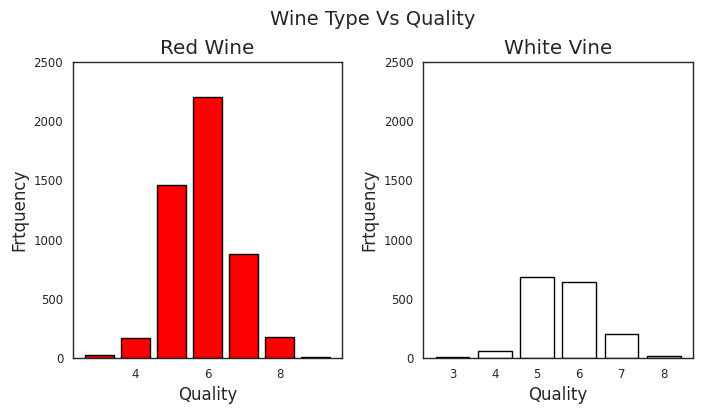

In [ ]:
# Гипотеза: Субклассы по оценкам внутри красных и белых вин также различны и несбалансированы
plot_bar(df, var='quality', title='Wine Type Vs Quality', axes_titles=['Red Wine', 'White Vine'], x_label_title='Quality',
             y_label_title='Frtquency', colors=['red', 'white'])

И среди красных, и среди белых вин доля вин высокого качества очень невелика. Зато среди белых вин примерно поровну продукции низкого и среднего качества, а среди красных продукции низкого качества почти вдвое меньше, чем среднего

In [ ]:
# гипотеза: Зависимости качества красных вин и белых вин от физико-химических характеристик также различны
# Разбиваем датасет на 2 - red и white
red = df[df['type']=='red']
white = df[df['type']=='white']


In [ ]:
# Тепловая карта корреляции позволит оценить важность признаков. построим 3 таких карты - для всего датасета и отдельно для красных и белых вин

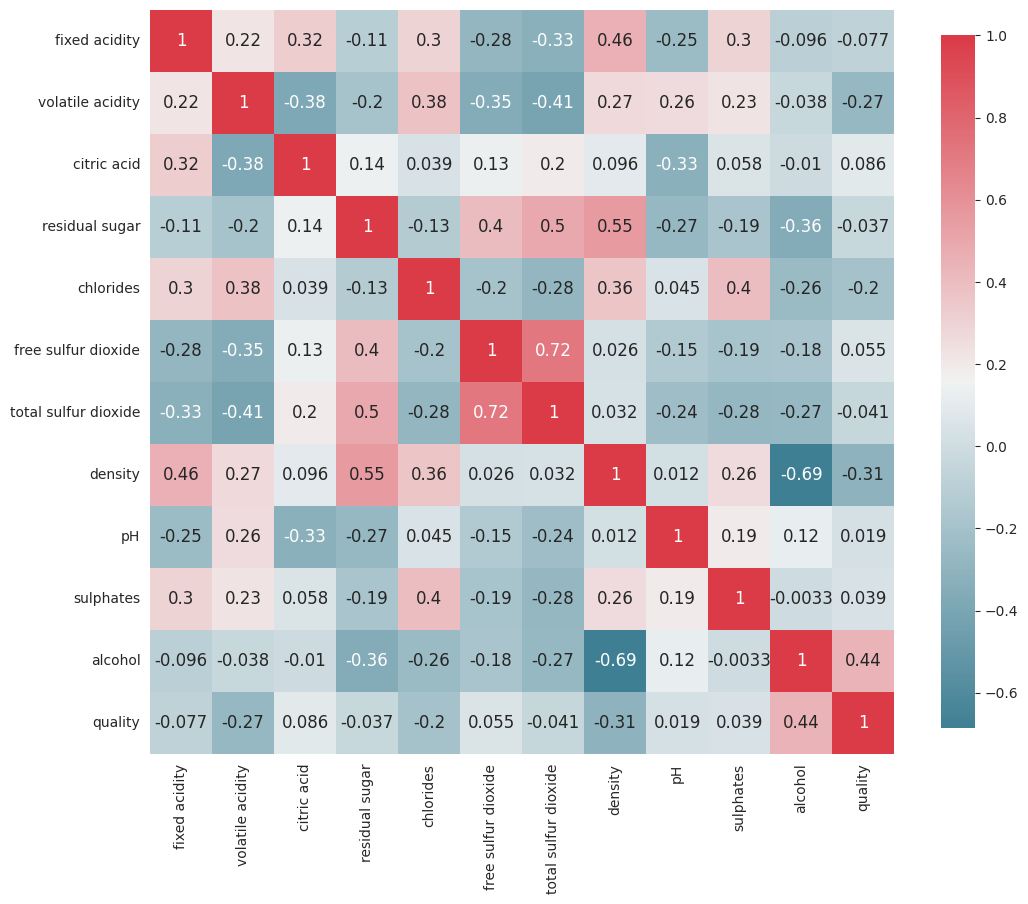

In [ ]:
# карта корреляции для всего датасета
plot_correlation_map(df)

Наибольшую корреляцию с target имеют признаки: alcohol, density,volatile_acidity, clorides, Ph

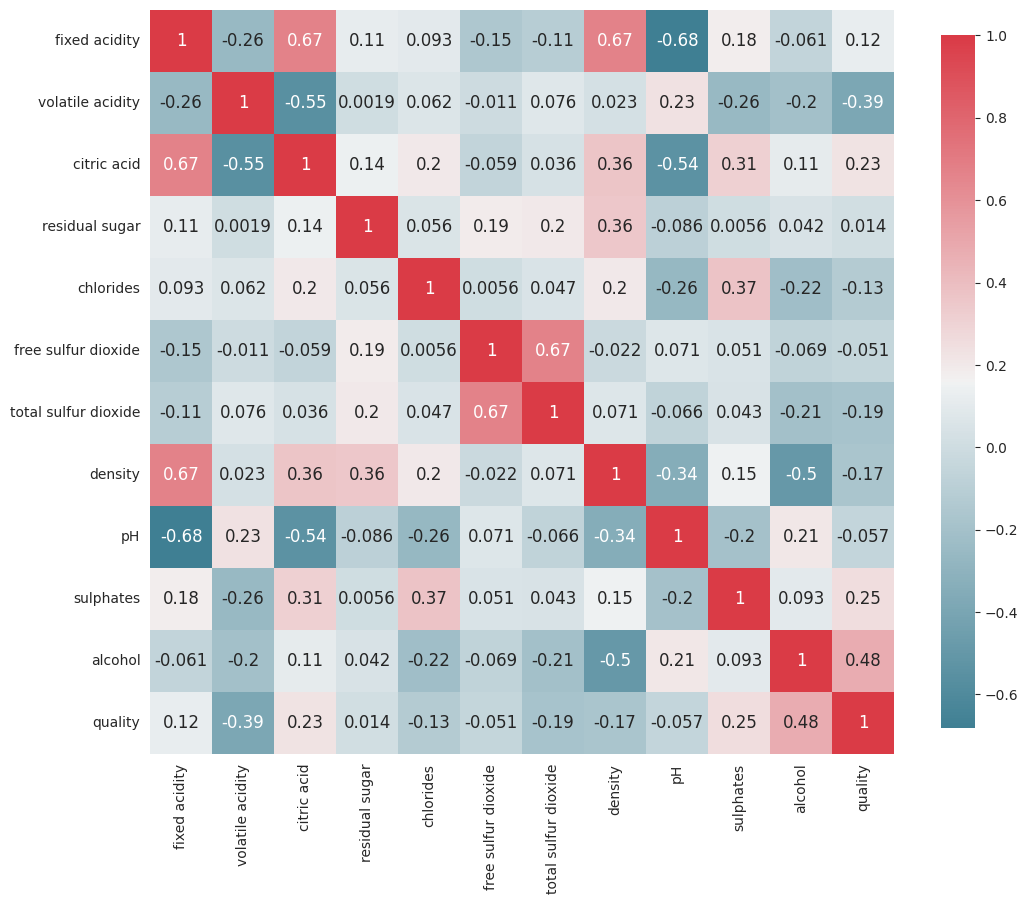

In [ ]:
# Карта корреляции для красных вин
plot_correlation_map(red)

Наибольшую корреляцию с target имеют признаки: alcohol, volatile_acidity,density, sulphates, citric acid, total_sulphur dioxides

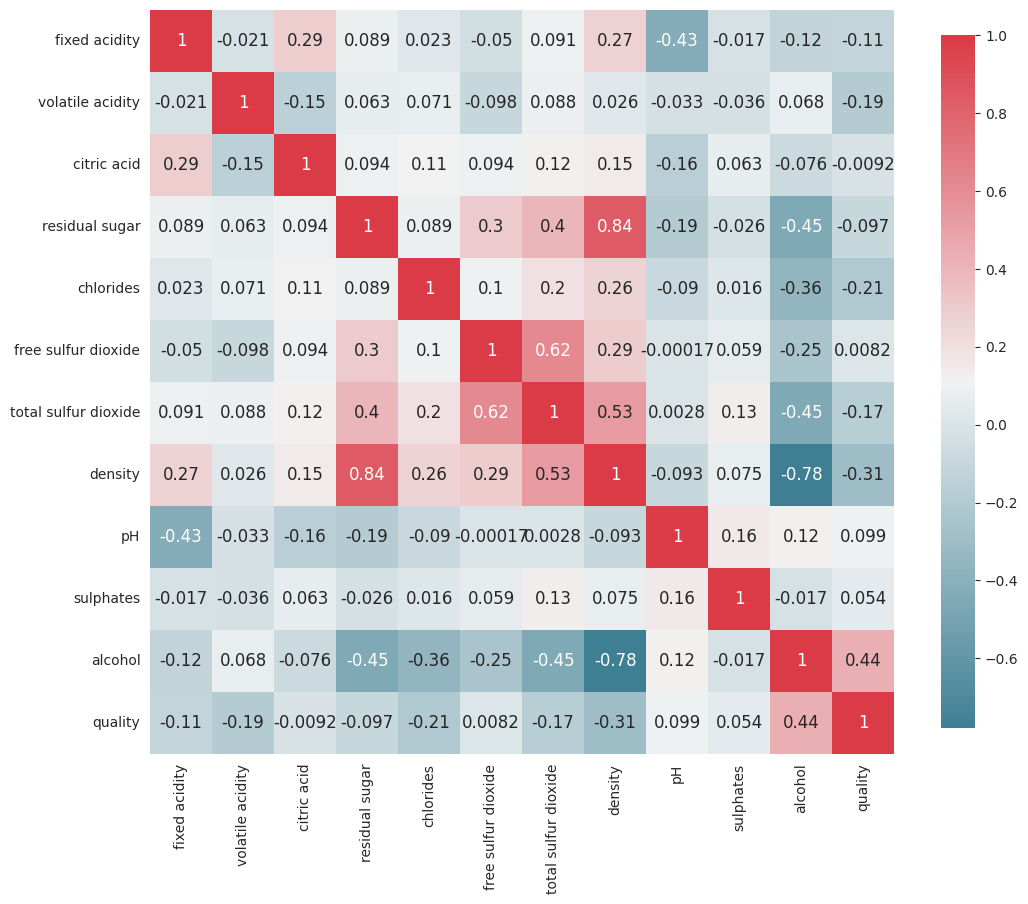

In [ ]:
# Карта корреляции для белых вин
plot_correlation_map(white)

Наибольшую корреляцию с target имеют признаки: alcohol, density, sulphates, cvolatile_acidity, total_sulphur dioxides

Рассмотрим подробнее взаимосвязь между признаками и качеством вина (отдельно для red и white)

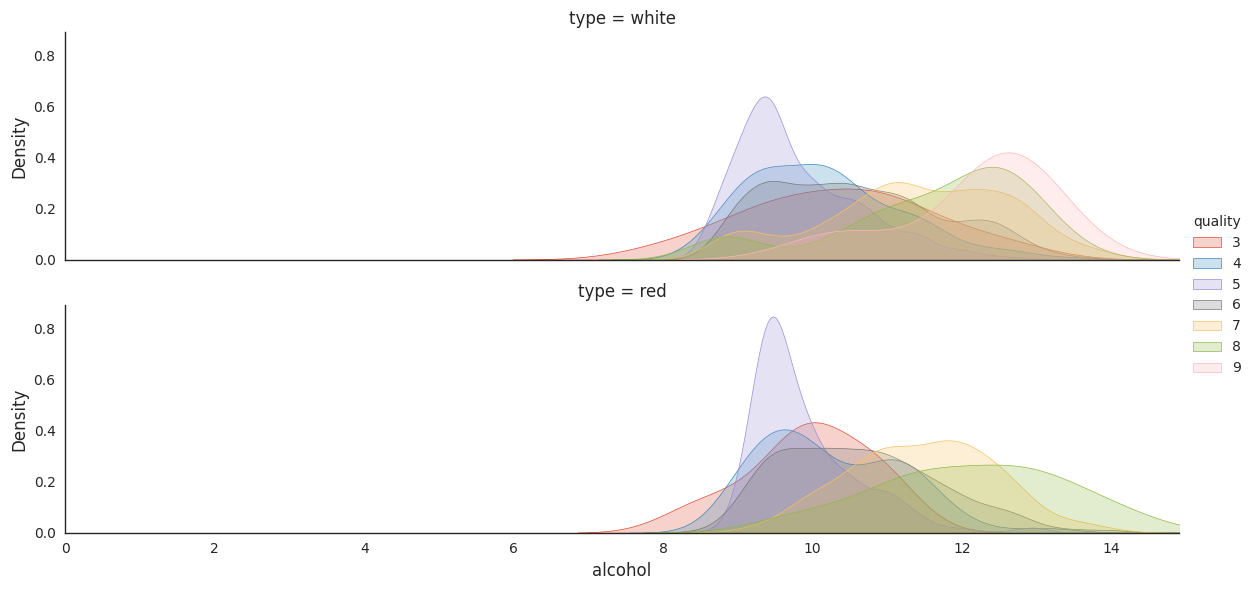

In [ ]:
# Красные вина: Наибольшую корреляцию с target имеют признаки: alcohol, volatile acidity,density, sulphates, citric acid, total_sulphur dioxides
plot_distribution(df, var='alcohol', target='quality', row='type')

в более качественных белых винах при одинаковой с красными плотности содержании алкоголя  выше. Вина с классом качества 5 имеют максимальную плотность и примерно равный процент алкоголя

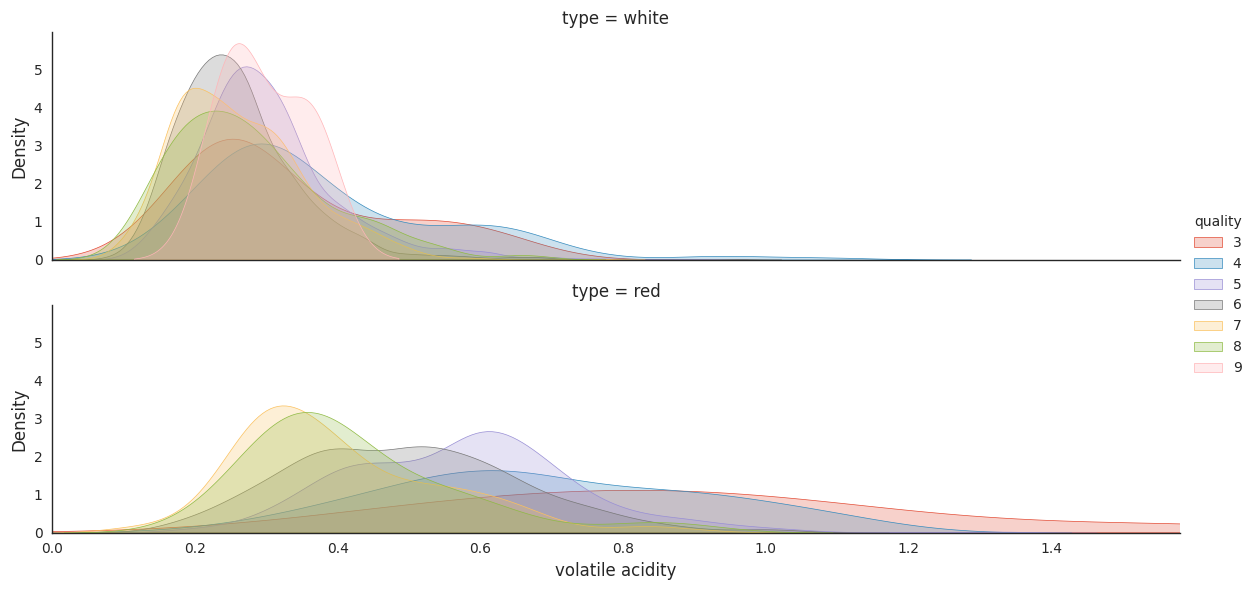

In [ ]:
plot_distribution(df, var='volatile acidity', target='quality', row='type')

Красные вина в целом более плотные, чем белые

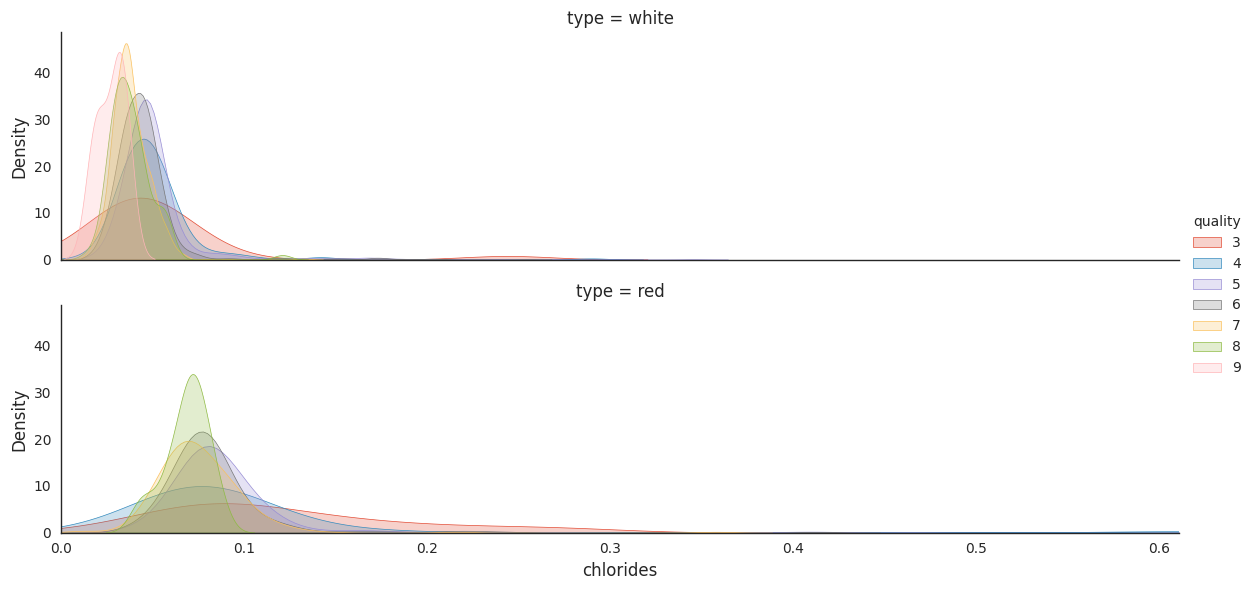

In [ ]:
plot_distribution(df, var='chlorides', target='quality', row='type')

В красных винах при равной плотности с белыми большее содержание хлоридов

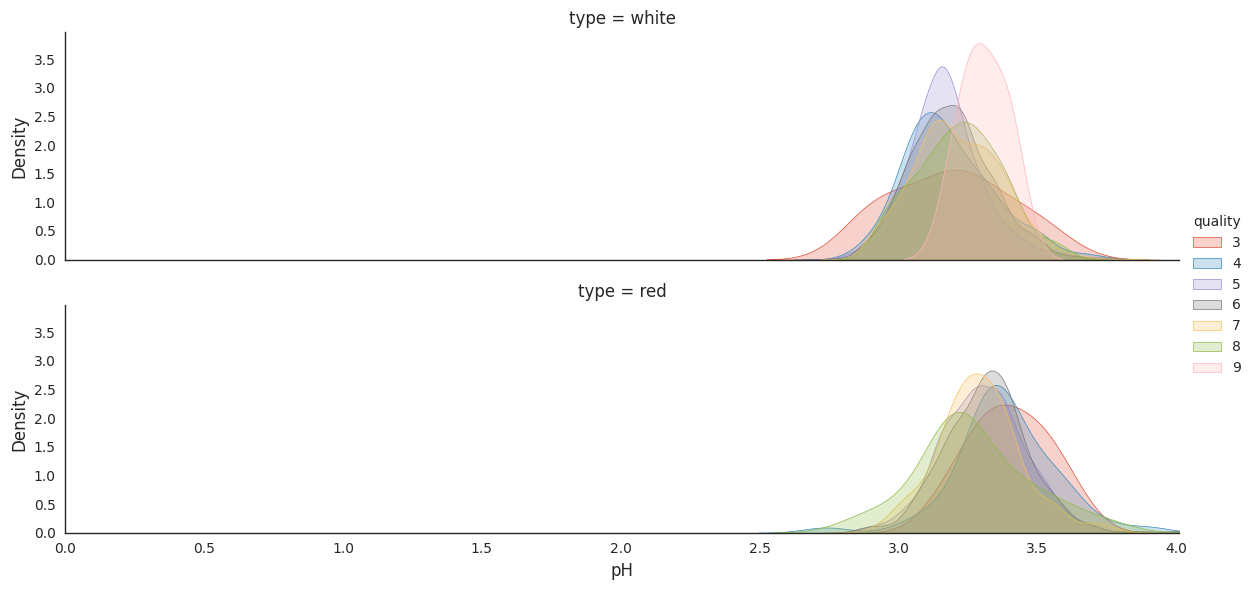

In [ ]:
plot_distribution(df, var='pH', target='quality', row='type')

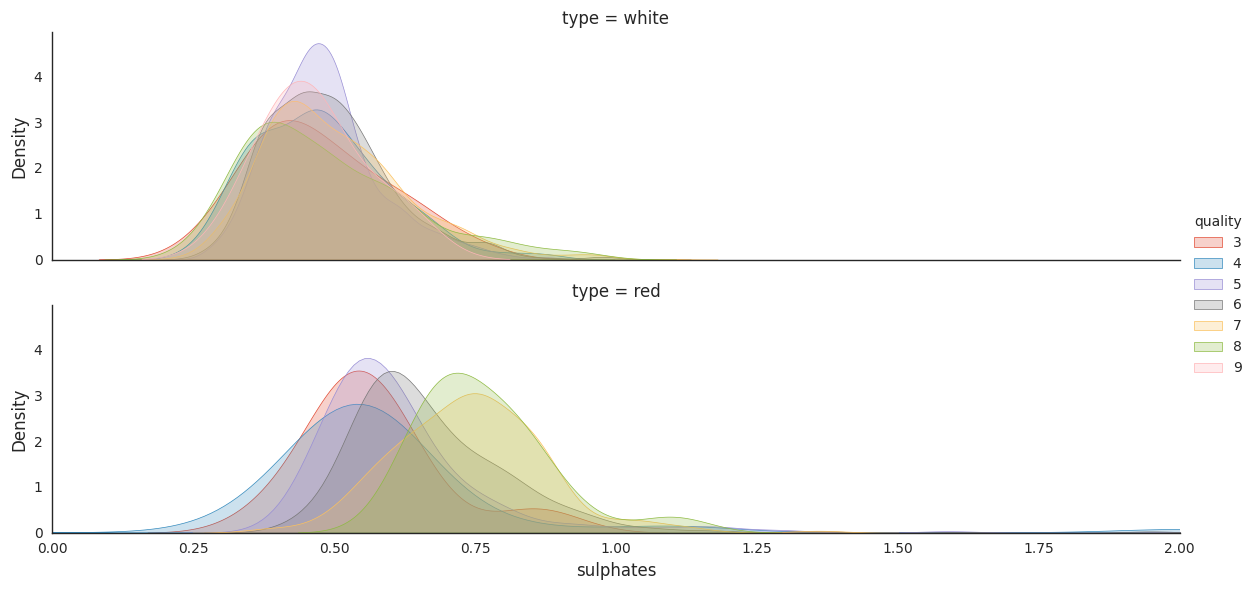

In [ ]:
plot_distribution(df, var='sulphates', target='quality', row='type')

Выводы по разделу:
Классы упорядочены и не сбалансированы (например, нормальных вин (среднего качества) намного больше, чем отличных или плохих).
Для обнаружения супер отличных или супер плохих вин можно использовать алгоритмы обнаружения выбросов.
Пока нет уверенности, что все имеющиеся признаки влияют на конечный результат. Поэтому при низком качестве модели,пгостроенной на всех признаках, планируется использовать методы отбора признаков

### Inference statistics

Общее понятие инференциальной статистики состоит в том, чтобы сделать выводы и предположения о популяции, используя выборку данных. Идея состоит в том, чтобы использовать статистические методы и модели для получения статистических выводов из заданных гипотез. Каждая гипотеза состоит из нулевой гипотезы H0 и альтернативной гипотезы HA. На основании результатов статистического теста, если результат статистически значим на основе заранее установленных уровней значимости (например, если полученное значение p составляет менее 5% уровня значимости), мы отклоняем нулевую гипотезу в пользу альтернативной гипотезы. В противном случае, если результаты не являются статистически значимыми, мы приходим к выводу, что наша нулевая гипотеза верна.

Отличной статистической моделью, позволяющей доказать или опровергнуть разницу в средних значениях между подмножествами данных, является использование однофакторного теста ANOVA для анализа статистически значимых различий между средними значениями различных групп.

Альтернативная гипотеза, HA, говорит нам, что существуют как минимум два групповых средних, которые статистически значимо отличаются друг от друга. Обычно для определения статистической значимости используется F-статистика и связанное с ней значение p. Обычно значение p менее 0,05 считается статистически значимым результатом, когда мы отвергаем нулевую гипотезу в пользу исходной.


In [ ]:
print('ANOVA test across wine samples with different types:\n')
# - Mean residual sugar and total sulfur dioxide content in white wine seems to be much higher than red wine.
type_inf_stat_test('residual sugar')
type_inf_stat_test('total sulfur dioxide')
#- Mean value of sulphates, fixed acidity and volatile acidity seem to be higher in red wine as compared to white wine.
type_inf_stat_test('sulphates')
type_inf_stat_test('fixed acidity')
type_inf_stat_test('volatile acidity')
#- From all numbers, we can observe that citric acid is more present in white than red wines.
type_inf_stat_test('citric acid')
#- In general, white wines has half concentrations of chlorides then red wines.
type_inf_stat_test('chlorides')
#- Although in Ph the difference seems small it is interesting to note that it is slightly larger in green red wines.
type_inf_stat_test('pH')

ANOVA test across wine samples with different types:

residual sugar: F Statistic: nan 	p-value: nan 	Null Hypothesis: Accept
total sulfur dioxide: F Statistic: 6252.80 	p-value: 0.000 	Null Hypothesis: Reject
sulphates: F Statistic: nan 	p-value: nan 	Null Hypothesis: Accept
fixed acidity: F Statistic: nan 	p-value: nan 	Null Hypothesis: Accept
volatile acidity: F Statistic: nan 	p-value: nan 	Null Hypothesis: Accept
citric acid: F Statistic: nan 	p-value: nan 	Null Hypothesis: Accept
chlorides: F Statistic: nan 	p-value: nan 	Null Hypothesis: Accept
pH: F Statistic: nan 	p-value: nan 	Null Hypothesis: Accept


Проверка выявила, что статистически значимым являются тольо различия в уровне total sulfur dioxide

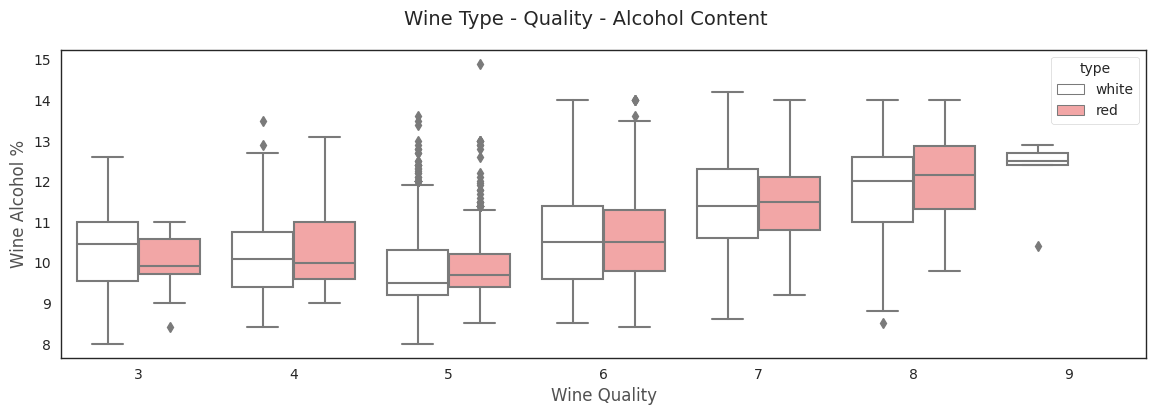

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(14, 4))
f.suptitle('Wine Type - Quality - Alcohol Content', fontsize=14)

sns.boxplot(x='quality', y='alcohol', hue='type', data=df, palette={"red": "#FF9999", "white": "white"}, ax=ax)
ax.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)

plt.show()

## 2.4. Verify data quality (Проверка качества данных)

In [ ]:
#Get the numbers of Null values in columns, in descending order.
print('Пропуски:')
df.isna().sum().sort_values(ascending=False).head(9)

Пропуски:


fixed acidity          10
pH                      9
volatile acidity        8
sulphates               4
citric acid             3
residual sugar          2
chlorides               2
type                    0
free sulfur dioxide     0
dtype: int64

#3. Data Preparation (Подготовка данных)

##3.1. Select data (Выборка данных)

In [ ]:
d = df[(pd.isnull(df['fixed acidity'])|
        pd.isnull(df['pH'])|
        pd.isnull(df['volatile acidity'])|
        pd.isnull(df['sulphates'])|
        pd.isnull(df['citric acid'])|
        pd.isnull(df['residual sugar'])|
        pd.isnull(df['chlorides']))
        ]
print(f"""% данных, удаляемый при удалении пропусков:
{len(d)/df.shape[0]*100}""")

% данных, удаляемый при удалении пропусков: 
0.5233184546713868


In [ ]:
# Пропуски можно удалить
df = df[~(pd.isnull(df['fixed acidity'])|
        pd.isnull(df['pH'])|
        pd.isnull(df['volatile acidity'])|
        pd.isnull(df['sulphates'])|
        pd.isnull(df['citric acid'])|
        pd.isnull(df['residual sugar'])|
        pd.isnull(df['chlorides']))
        ]

## 3.2. Clean Data ( Очистка данных)

In [ ]:
# Drop duplicates
df.drop_duplicates(inplace=True)

Фуннкция для очистки данных clean_data()

In [ ]:
def clean_data(df: pd.DataFrame) -> pd.DataFrame:
  """Удаление пропусков, удаление дубликатов
  Args: df: pd.DataFrame
  Return: df: pd.DataFrame"""
  d = df[(pd.isnull(df['fixed acidity'])|
        pd.isnull(df['pH'])|
        pd.isnull(df['volatile acidity'])|
        pd.isnull(df['sulphates'])|
        pd.isnull(df['citric acid'])|
        pd.isnull(df['residual sugar'])|
        pd.isnull(df['chlorides']))
        ]
  if len(d)/df.shape[0]*100 <5:
    df = df[~(pd.isnull(df['fixed acidity'])|
        pd.isnull(df['pH'])|
        pd.isnull(df['volatile acidity'])|
        pd.isnull(df['sulphates'])|
        pd.isnull(df['citric acid'])|
        pd.isnull(df['residual sugar'])|
        pd.isnull(df['chlorides']))
        ]
    df.drop_duplicates(inplace=True)
    return df

In [ ]:
df=clean_data(df)

## 3.3 Construct data (Конструирование данных)

In [ ]:
# Замена категориальной переменной type (тип вина) на числовую (0 и 1)
replace_dict = {'red':0, 'white':1}
df['type'] =df['type'].map(replace_dict)

In [ ]:
numeric_features = df.drop(columns=['type', 'quality']).columns.tolist()
numeric_features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

Согласно диаграммам квантиль-квантиль, тесту Шапиро и гистограммам распределения признаков, нормализации следует подвергнуть free sulfur dioxide, total sulfur dioxide,density,alcohol, quality

In [ ]:
# X=df[num_features_names]
X = df[numeric_features]

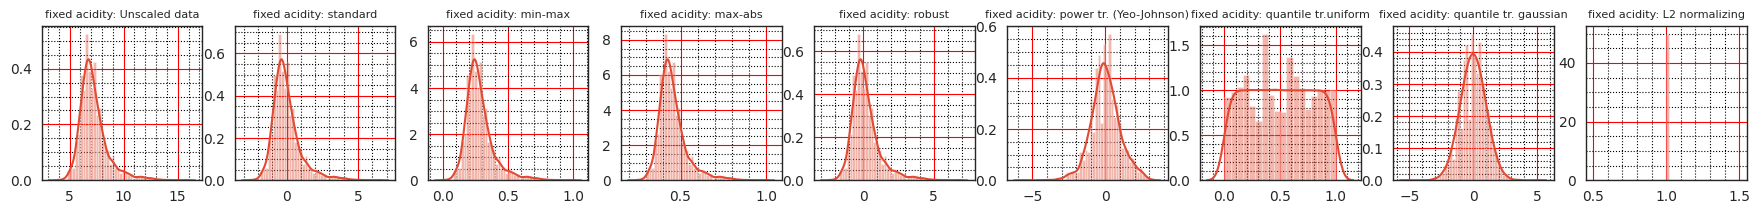

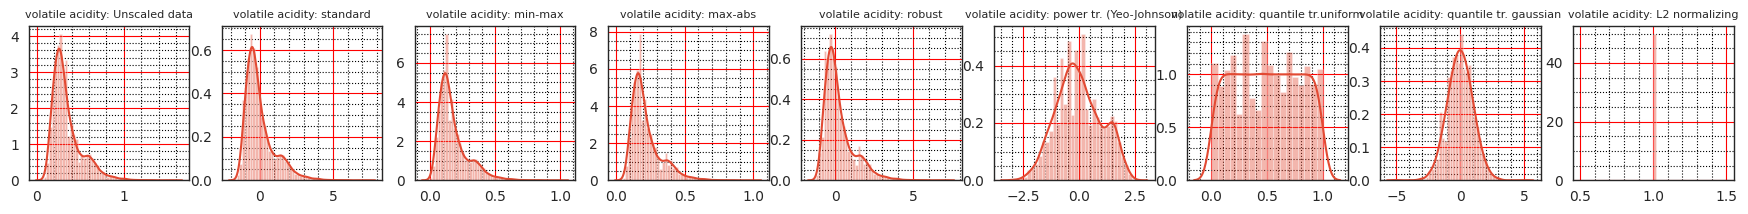

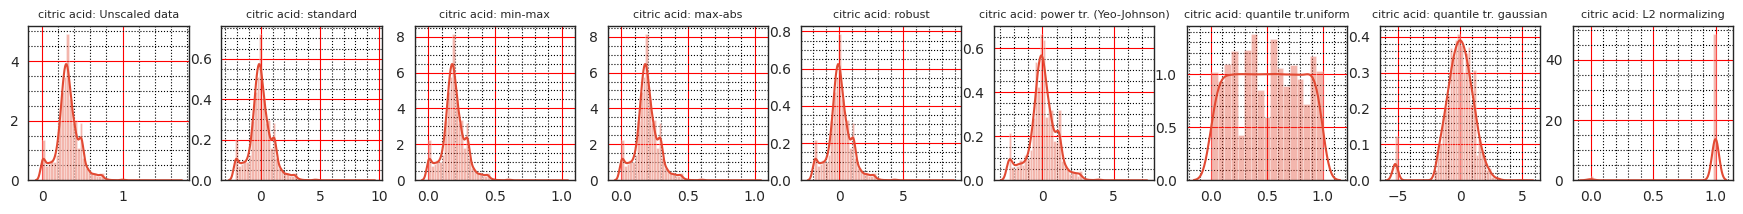

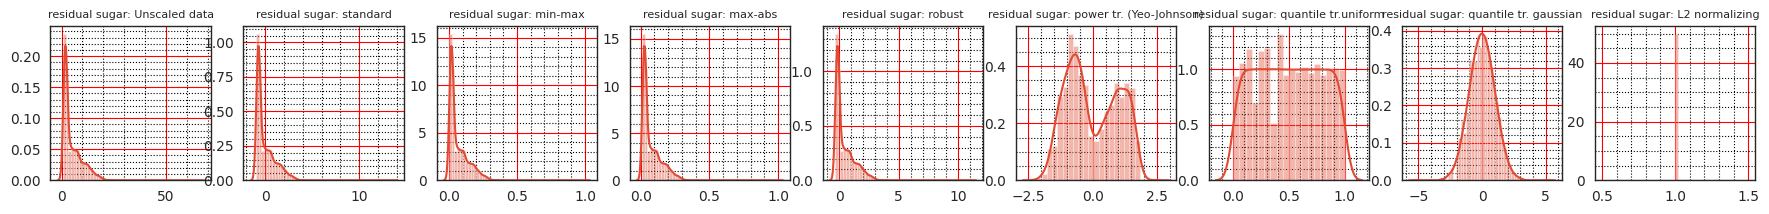

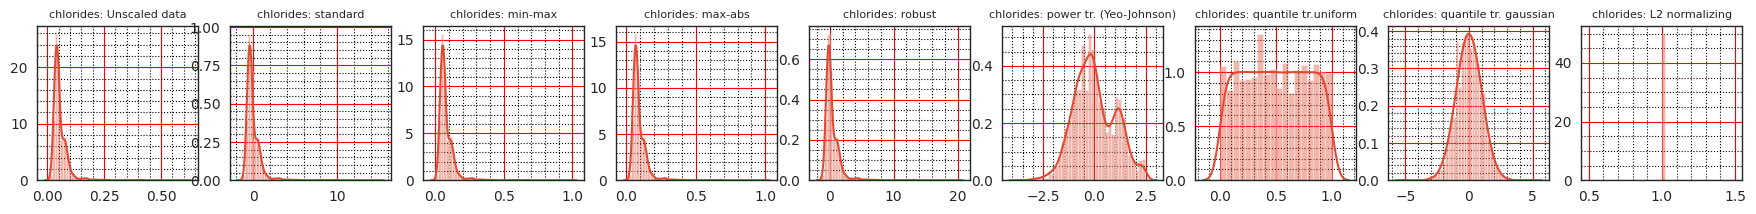

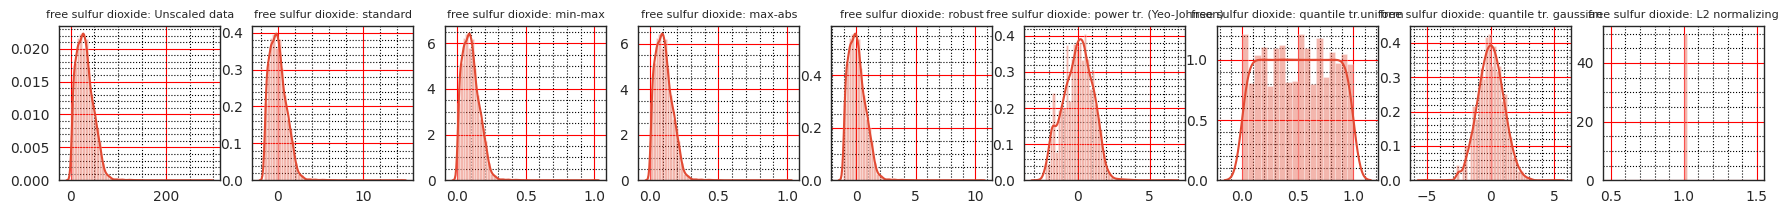

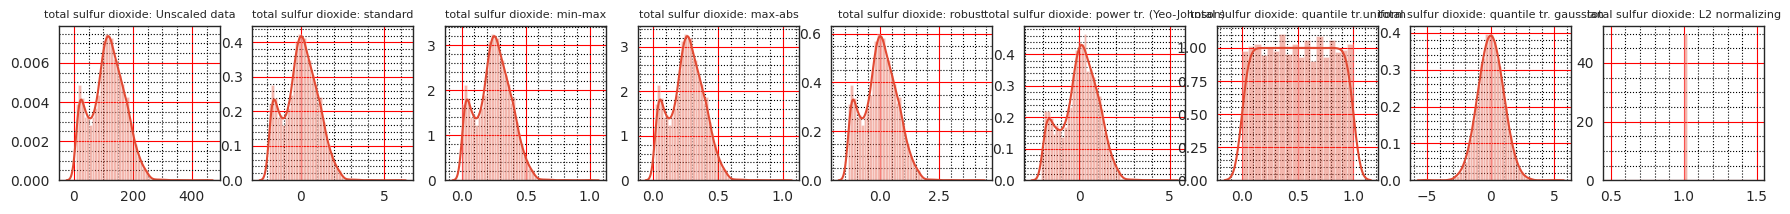

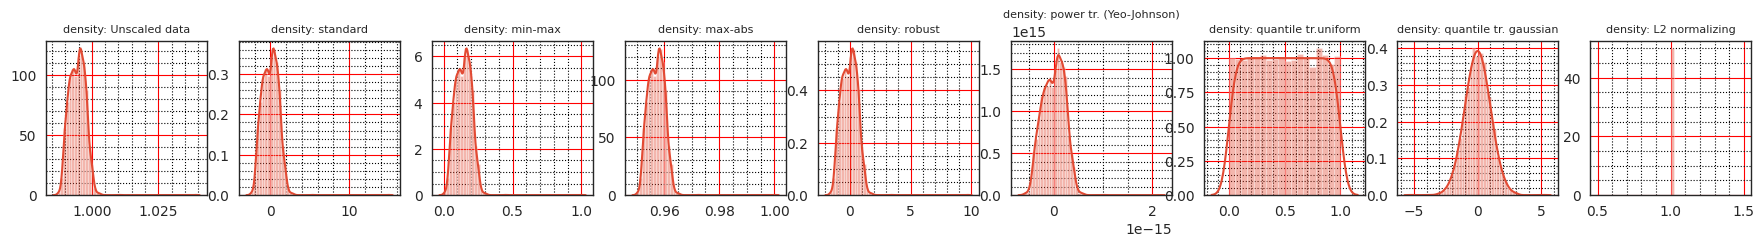

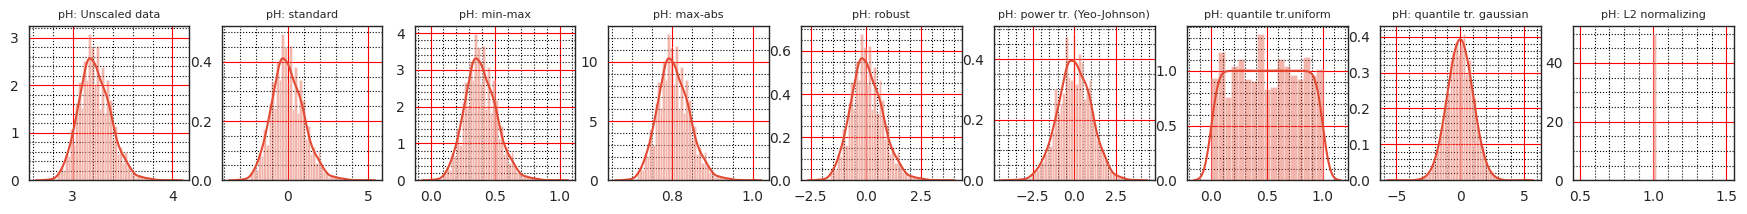

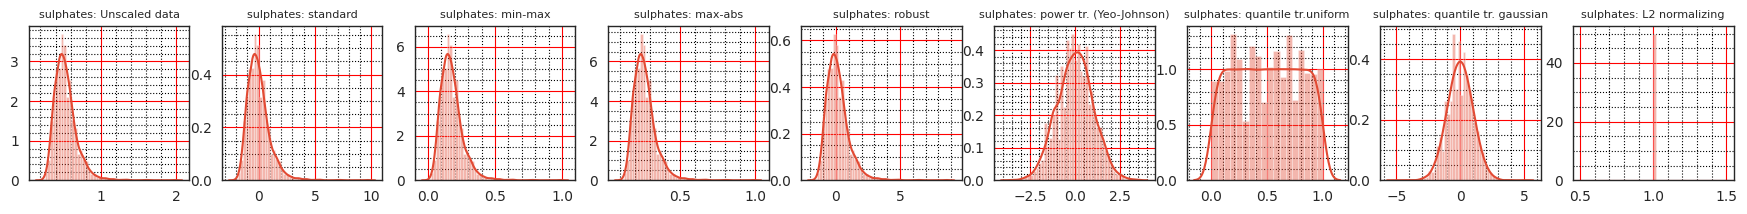

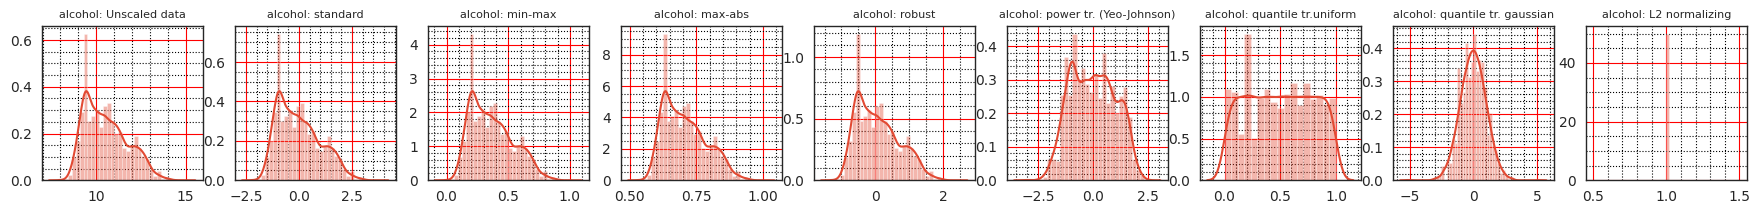

In [ ]:
# get_transform(X, num_features_names)
get_transform(X, numeric_features)

Для большинства признаков удовлетворительной трансформацией видится QuantileTransformer(output_distribution="normal").

In [ ]:
# num_features_names = num_features_names[:-1]

In [ ]:
# Пайплайн комбинированной трансформации признаков с помощью StandardScaler и QuantileTransformer
scal_features = ['quality']
# quant_features = num_features_names[:-1]
quant_features = numeric_features

scal_transformer = Pipeline(
    steps=[ ("scaler", StandardScaler())]
)

quant_transformer = Pipeline(steps=[ ("scaler", QuantileTransformer())])
combine_preprocessor = ColumnTransformer(
    transformers=[
        ("scal", scal_transformer, scal_features),
        ("quant", quant_transformer, quant_features),
]
)

In [ ]:
pipelines = []
pipelines.append(('CombineTransformer', Pipeline([("combine_preprocessor", combine_preprocessor),
                                     ('RFC', RandomForestClassifier())])))

##3.4. Integrate Data ( Интеграция данных)

In [ ]:
# Сильный дисбаланс классов типа виа в выборке
df['type'].value_counts()

white    3942
red      1353
Name: type, dtype: int64

In [ ]:
y = df['type']

In [ ]:
X_reg = pd.concat([X,y], axis=1)

In [ ]:
y_reg = df['quality']

In [ ]:
# для устранения дисюаланса  при бинарной классификации используем библиотеку SMOTE
sm = SMOTE(random_state=42, k_neighbors=5)
X, y = sm.fit_resample(X, y)

y_tmp = y.to_frame()

data=pd.concat([X,y_tmp], axis=1) # Новый датафрейм после оверсэмплинга. Дальше работаем с ним
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            6.2              0.32         0.16             7.0      0.045   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 30.0                 136.0   0.9949  3.18       0.47   

   alcohol  type  
0      8.8     1  
1      9.5     1  
2     10.1     1  
3      9.9     1  
4      9.6     1

In [ ]:
sm1 = SMOTE(random_state=42, k_neighbors=4)
X_reg, y_reg = sm1.fit_resample(X_reg, y_reg)
y_tmp_reg = y_reg.to_frame()
data_reg=pd.concat([X_reg,y_tmp_reg], axis=1) # Новый датафрейм для регрессии после оверсэмплинга. Дальше работаем с ним
data_reg.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            6.2              0.32         0.16             7.0      0.045   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 30.0                 136.0   0.9949  3.18       0.47   

   alcohol  type  quality  
0      8.8     1        6  
1      9.5     1        6  
2     10.1     1        6  
3      9.9     1        6  
4      9.6     1        6

##3.5. Format data (Форматирование данных)

In [ ]:
def build_features(df: pd.DataFrame) -> pd.DataFrame:
  """Конструирование признаков
  Args: pd.DataFrame
  Return: pd.DataFrame"""
  # Замена категориальной переменной type (тип вина) на числовую (0 и 1)
  replace_dict = {'red':0, 'white':1}
  df['type'] =df['type'].map(replace_dict)
  # определяем колонки с числовыми признаками
  numeric_features = df.drop(columns=['type', 'quality']).columns.tolist()
  # Подготовка датафрейма для бинарнгой классификации вин по типу
  X = df[numeric_features]
  y = df['type']
  sm = SMOTE(random_state=42, k_neighbors=5)
  X, y = sm.fit_resample(X, y)
  y_tmp = y.to_frame()
  data = pd.concat([X,y_tmp], axis=1) # Новый датафрейм после оверсэмплинга.
  # Подготовка датафрейма для регрессии оценки качества
  X_reg = pd.concat([X,y], axis=1)
  y_reg = df['quality']
  sm1 = SMOTE(random_state=42, k_neighbors=4)
  X_reg, y_reg = sm1.fit_resample(X_reg, y_reg)
  y_tmp_reg = y_reg.to_frame()
  data_reg=pd.concat([X_reg,y_tmp_reg], axis=1)
  # Новый датафрейм для регрессии после оверсэмплинга.
  return data, data_reg

In [ ]:
data, data_reg = build_features(df)

ValueError: ignored

#4. Modeling (Моделирование)

## 4.1. Select Modelling techniques (Выбор алгоритмов)

Фактически на данном датсете мы решаем две различные задачи.

Первая - построение модели классификации вина по типу (red, white) в зависимости от значений физико-химических показателей. Эта модель нужна, во-первых, для заполнения возможных пропусков в столбце 'type' и , во-вторых, можерт пригодиться для проверки типа вина в закрытой таре при наличии сопроводительной документации с физико-химичексими характериастиками. Первую задачу можно решать, выбирая различные модели классификации. В качестве базовой выберем RandomForestClassifier, При получении неудовлетворительных результатов будут рассмотрены другие варианты вплоть до ансамблевых алгоритмов и нейросетей.
Далее можно использовать гиперпараметризацию, перекрестную проверку и сравнивать результаты различных метрик.

Вторая - это прогнозирование оценки вина по 10-балльной шкале в зависимости от значения физико-химических показателей и типа вина. Эту задачу можно решать как регрессию (определение балла вина) или как мультиклассовую классификацию ( опеделению принадлежности к одному из классов)

Более того,и первую, и вторую задачи можн решить в рамках одной модели с несколькими выходами. Действительно, входные данные же - одни и те же!

## 4.2. Generate Test Design (Подготовка плана тестирования)

##4.3. Build Model (Создание и обучение модели)

In [ ]:
def train_model(df,random_seed,  model):
  """
  Служебная функция. выполняет:
    - разделение на Train и test
    - обучение модели
    df- датафрейм, random_seed - фиксатор генератора случ.чисел,
    model - модель классификатора,
  """


  X = df.drop(columns=['type'])
  y = df['type']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

  rf = model
  rf.fit(X_train, y_train)

  return X,y, X_test, y_test, rf

In [ ]:
X, y, X_test, y_test, rf = train_model(data, 42,  RandomForestClassifier(criterion='entropy',random_state=42))

In [ ]:
results = dict()

In [ ]:
def eval_model(X, y, X_test, y_test, random_seed, model, flag):
  """
  Служебная функция. выполняет:
    - расчет метрик качества модели бинарной классификации вина по типу в виде classification_report
    - построение confusion matrix
    - кросс-валидацию модели
    args:
    X: pd.DataFrame - датафрейм признаков,
    y: np.ndarray - массив целевой переменной,
    X_test: pd.DataFrame - тестовый датафрейм
    y_test: np.ndarray - тестовый массив целевой переменной,
    random_seed - фиксатор генератора случ.чисел,
    model - модель классификатора,
    flag - признак печати результатов (True/False)
  """
  num_folds = 9
  scoring = 'r2'

  kfold = StratifiedKFold(n_splits=num_folds, random_state=random_seed, shuffle=True)


  y_pred = model.predict(X_test)
  target_names = ['red', 'white']
  # Отчет полностью
  report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True )
  a = report['accuracy']
  scoring = ['precision_macro', 'recall_macro']
  cv_results = cross_validate(model, X, y, cv=kfold, scoring=scoring)
  if flag:
    print(
      "Classification report\n")
    print(
      f"{classification_report(y_test, y_pred, target_names=target_names)}\n"
    )
    # Confusion matrix
    fig, ax = plt.subplots(figsize=(6, 3))

    cm = confusion_matrix(y_test, y_pred)
    cmp = ConfusionMatrixDisplay(cm, display_labels=target_names)
    cmp.plot(ax=ax, xticks_rotation='vertical')
    plt.show()


  return cv_results


Classification report

              precision    recall  f1-score   support

         red       1.00      0.99      0.99       779
       white       0.99      1.00      0.99       798

    accuracy                           0.99      1577
   macro avg       0.99      0.99      0.99      1577
weighted avg       0.99      0.99      0.99      1577




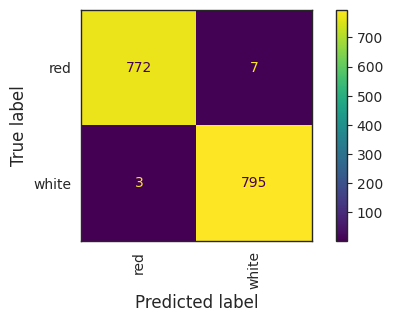

In [ ]:
results['baseline'] = eval_model(X, y, X_test, y_test, 42, rf, flag=True)

0.9984779299847792


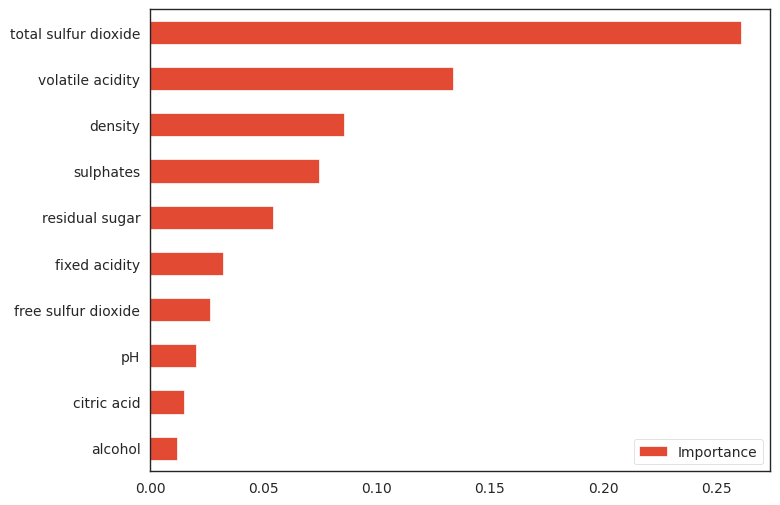

In [ ]:
# Оценка важности признаков для бинарной классификации вина по типу с использованием RandomForestClassifier
plot_model_var_imp(rf, X, y_tmp)

Метрики классификатора - хорошие, совершенствовать его нет необходимости, тип вина предсказывается с точностью 99%. Таким образом, у нас ест модель для заполнения пропусков в поле type в случае, если они появятся, и если будет необходимо определить тип вина  в закрытой таре, снабженной биркой со значениями физико-химических характеристик

In [ ]:
# Эксперимент - как повлияет трансформация признаков на метрики качества бинарной модели
# ВЫполняем трансформацию признаков с целью достижения их нормального распределения с помощью QuantileTransformer
qt = QuantileTransformer(n_quantiles=10, random_state=42)
names=[]
for name in numeric_features:
  names.append(qt.fit_transform(data[name].to_numpy().reshape(-1,1)))
names = [arr.reshape(1, -1)[0] for arr in names]
X_transform = pd.DataFrame(names).transpose()
X_transform.columns=numeric_features
X_transform.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.407407          0.277778     0.666667        0.910516   0.296296   
1       0.166667          0.355616     0.611111        0.148148   0.365079   
2       0.725253          0.305556     0.755556        0.804498   0.380952   
3       0.479382          0.177778     0.555556        0.851059   0.478632   
4       0.138889          0.400182     0.188093        0.807408   0.296296   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.858586              0.885057  0.896264  0.091503   0.203704   
1             0.305556              0.728613  0.307454  0.622222   0.305556   
2             0.666667              0.541667  0.419256  0.528465   0.185185   
3             0.878788              0.895085  0.486381  0.356016   0.111111   
4             0.666667              0.748279  0.397343  0.333333   0.250000   

    alcohol  
0  0.068376  
1  0.222222  
2  0.444444  
3  0.370370  
4  0.259259

In [ ]:
# Датасет из трансформированных признаков и целевой переменной для бинарной классификации
data_transform= pd.concat([X_transform, y_tmp], axis=1)

In [ ]:
# Обучение бинарнгой классификации
X, y, X_test, y_test, rf_transformed = train_model(data_transform, 42,  RandomForestClassifier(criterion='entropy',random_state=42))

Classification report

              precision    recall  f1-score   support

         red       1.00      0.99      0.99       779
       white       0.99      1.00      0.99       798

    accuracy                           0.99      1577
   macro avg       0.99      0.99      0.99      1577
weighted avg       0.99      0.99      0.99      1577




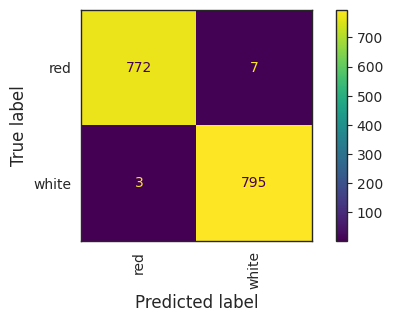

In [ ]:
# Оценка модели бинарной классификации
results['transformed'] = eval_model(X, y, X_test, y_test, 42, rf_transformed, flag=True)

In [ ]:
# Трансформированныйдатасет для регрессии
data_reg_transform = pd.concat([data_transform, data_reg['quality']], axis=1)
data_reg_transform.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.407407          0.277778     0.666667        0.910516   0.296296   
1       0.166667          0.355616     0.611111        0.148148   0.365079   
2       0.725253          0.305556     0.755556        0.804498   0.380952   
3       0.479382          0.177778     0.555556        0.851059   0.478632   
4       0.138889          0.400182     0.188093        0.807408   0.296296   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.858586              0.885057  0.896264  0.091503   0.203704   
1             0.305556              0.728613  0.307454  0.622222   0.305556   
2             0.666667              0.541667  0.419256  0.528465   0.185185   
3             0.878788              0.895085  0.486381  0.356016   0.111111   
4             0.666667              0.748279  0.397343  0.333333   0.250000   

    alcohol  type  quality  
0  0.068376   1.0        6  
1  0.222222   1.0        6  
2  0.444444   1.0        6  
3  0.370370   1.0        6  
4  0.259259   1.0        6

## Решение обеих задач в рамках одной модели

Сначала пробуем решить на несбалансированном и нетрансформированном датасете

In [ ]:
y = df['quality']
X = df.drop(columns=['quality'])
X.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     1            7.0              0.27         0.36            20.7   
1     1            6.3              0.30         0.34             1.6   
2     1            8.1              0.28         0.40             6.9   
3     1            7.2              0.23         0.32             8.5   
6     1            6.2              0.32         0.16             7.0   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
6      0.045                 30.0                 136.0   0.9949  3.18   

   sulphates  alcohol  
0       0.45      8.8  
1       0.49      9.5  
2       0.44     10.1  
3       0.40      9.9  
6       0.47      9.6

In [ ]:
def get_labels(data: pd.DataFrame) -> tuple:
    """ Получение из общего датасета меток type и quality"""
    type_wine = data.pop('type')
    type_wine = np.array(type_wine)
    quality = data.pop('quality')
    quality = np.array(quality)
    return (quality, type_wine)

In [ ]:
# Разбиваем данные на train и test (80:20)
train, test = train_test_split(data_reg, test_size=0.2, random_state = 1)

#Train разбиваем на train и val (80:20).
train, val = train_test_split(train, test_size=0.2, random_state = 1)
# Получение меток type и quality для train, test and validate.
train_y = get_labels(train)
test_y = get_labels(test)
val_y = get_labels(val)

In [ ]:
def make_model() :
  # Строим модель CNN нейросети с двумя выходами
  # Вход - по числу признаков
  inputs = tf.keras.layers.Input(shape=(11,))
  # Полносвязные слои для созлания нелинейности
  x = Dense(units=32, activation='relu')(inputs)
  x = Dense(units=32, activation='relu')(x)

  # Выход для определения типа вина (бинарная классификация)
  y_t_layer = Dense(units = 1, activation='sigmoid', name='y_t_layer')(x)

  #Еще один полносвязный уровень для последующего добавления выхода по качеству (x)
  quality_layer=Dense(units=64, name='quality_layer', activation='relu')(x)

  # Выход для опеделения качества (регрессия)
  y_q_layer = Dense(units=1, name='y_q_layer')(quality_layer)

  model = Model(inputs=inputs, outputs=[y_q_layer, y_t_layer])

  optimizer = tf.keras.optimizers.Adam()

  #Для каждого выхода - свои метрики и функции потерь

  model.compile(optimizer=optimizer,
                loss = {'y_t_layer' : 'binary_crossentropy',
                        'y_q_layer' : 'mean_squared_error'
                      },
                metrics = {'y_t_layer' : 'accuracy',
                          'y_q_layer': [tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.MeanSquaredError(), tf.keras.metrics.MeanAbsoluteError()]
                        }
              )
  return model

In [ ]:
model = make_model()

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 11)]                 0         []                            
                                                                                                  
 dense_4 (Dense)             (None, 32)                   384       ['input_3[0][0]']             
                                                                                                  
 dense_5 (Dense)             (None, 32)                   1056      ['dense_4[0][0]']             
                                                                                                  
 quality_layer (Dense)       (None, 64)                   2112      ['dense_5[0][0]']             
                                                                                            

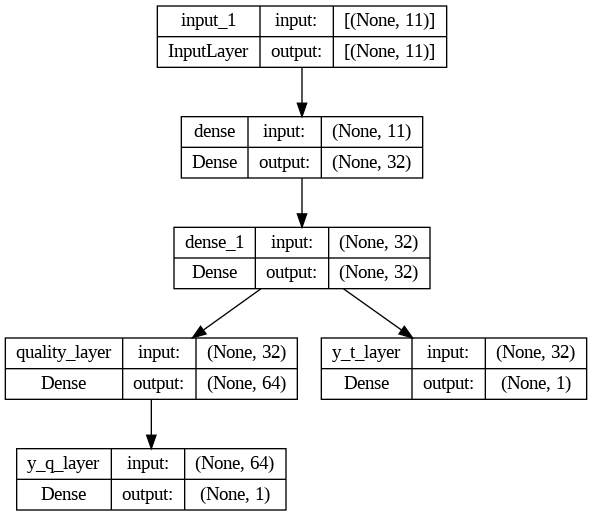

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
def scale_data(df):
    # Нормализуем данные, используя mean и std от train.
    return (df - train_stats['mean']) / train_stats['std']

In [ ]:
#Scaling the 3 datasets.
train_stats = train.describe()
train_stats = train_stats.transpose()
train_X = scale_data(train)
test_X = scale_data(test)
val_X = scale_data(val)

In [ ]:
def build_features_cnn(df) -> pd.DataFrame:
  # Получаем сбалансированный по SMOTE датасет для регрессии
  data, data_reg = build_features(df)
  # Выполняем трансформацию числовых признаков с помощью QuantileTransformer
  numeric_features = data_reg.drop(columns=['type', 'quality'])
  qt = QuantileTransformer(n_quantiles=10, random_state=42)
  names=[]
  for name in numeric_features:
    names.append(qt.fit_transform(data[name].to_numpy().reshape(-1,1)))
  names = [arr.reshape(1, -1)[0] for arr in names]
  X_transform = pd.DataFrame(names).transpose()
  X_transform.columns=numeric_features
  # Снова собираем все признаки для регрессии и обе целевые переменные
  # в датафрейм data_reg_transform
  data_transform= pd.concat([X_transform, data['type']], axis=1)
  data_reg_transform = pd.concat([data_transform, data_reg['quality']], axis=1)
  return data_reg_transform

In [ ]:
df = build_features_cnn(df)

In [ ]:
def train_model_cnn(df):
  # Разбиваем данные на train и test (80:20)
  train, test = train_test_split(df, test_size=0.2, random_state = 1)

  #Train разбиваем на train и val (80:20).
  train, val = train_test_split(train, test_size=0.2, random_state = 1)
  # Получение меток type и quality для train, test and validate.
  train_y = get_labels(train)
  test_y = get_labels(test)
  val_y = get_labels(val)
  model = make_model
  history = model.fit(train_X, train_y,
                    epochs = 50, validation_data=(val_X, val_y))
  eval_model_cnn(model, val_X, val_y)
  return model

In [ ]:
model = train_model_cnn(df)

In [ ]:
history = model.fit(train_X, train_y,
                    epochs = 50, validation_data=(val_X, val_y))

Epoch 1/50
324/324 [==============================] - 2s 6ms/step - loss: 0.4288 - y_q_layer_loss: 0.3827 - y_t_layer_loss: 0.0461 - y_q_layer_root_mean_squared_error: 0.6186 - y_q_layer_mean_squared_error: 0.3827 - y_q_layer_mean_absolute_error: 0.4529 - y_t_layer_accuracy: 0.9869 - val_loss: 0.5225 - val_y_q_layer_loss: 0.4749 - val_y_t_layer_loss: 0.0476 - val_y_q_layer_root_mean_squared_error: 0.6891 - val_y_q_layer_mean_squared_error: 0.4749 - val_y_q_layer_mean_absolute_error: 0.4969 - val_y_t_layer_accuracy: 0.9876
Epoch 2/50
324/324 [==============================] - 2s 5ms/step - loss: 0.4215 - y_q_layer_loss: 0.3760 - y_t_layer_loss: 0.0455 - y_q_layer_root_mean_squared_error: 0.6132 - y_q_layer_mean_squared_error: 0.3760 - y_q_layer_mean_absolute_error: 0.4486 - y_t_layer_accuracy: 0.9869 - val_loss: 0.5082 - val_y_q_layer_loss: 0.4606 - val_y_t_layer_loss: 0.0476 - val_y_q_layer_root_mean_squared_error: 0.6787 - val_y_q_layer_mean_squared_error: 0.4606 - val_y_q_layer_mean_

##4.4. Assess Model ( Оценка качества модели)

# 5. Evaluation (Оценка решения)

## 5.1. Evaluation Results (Оценка результатов)

In [ ]:
def eval_model_cnn(model, val_X, val_y):
  loss, wine_quality_loss, wine_type_loss, wine_quality_rmse, wine_quality_mse, wine_quality_mae, wine_type_accuracy = model.evaluate(x=val_X, y=val_y)

  print()
  print(f'loss: {loss}')
  print(f'wine_quality_loss: {wine_quality_loss}')
  print(f'wine_type_loss: {wine_type_loss}')
  print(f'wine_quality_rmse: {wine_quality_rmse}')
  print(f'wine_quality_mse: {wine_quality_mse}')
  print(f'wine_quality_mae: {wine_quality_mae}')
  print(f'wine_type_accuracy: {wine_type_accuracy}')

81/81 [==============================] - 0s 2ms/step - loss: 0.4713 - y_q_layer_loss: 0.4254 - y_t_layer_loss: 0.0459 - y_q_layer_root_mean_squared_error: 0.6522 - y_q_layer_mean_squared_error: 0.4254 - y_q_layer_mean_absolute_error: 0.4686 - y_t_layer_accuracy: 0.9880

loss: 0.47128942608833313
wine_quality_loss: 0.42541566491127014
wine_type_loss: 0.04587370529770851
wine_quality_rmse: 0.6522389650344849
wine_quality_mse: 0.42541566491127014
wine_quality_mae: 0.46857893466949463
wine_type_accuracy: 0.9880262613296509


## 5.2. Review Process (Оценка процесса)

## 5.3. Determine Next Steps (определение следующих шагов)

На следующем этапе можно поработать над улучшением модели в части регрессии оценки качества вина. Возможные пути решения:
  Попробовать трансформацию ланных с  помощью Quantile transformer
  Изменить оптимизатор,
  Изменить гиперпараметры оптимизатора,
  Изменить число нейронов на полносвязном слое,
  Изменить функцию активации,
  Добавить слой Dropout


# 6. Deployment (Внедрение)

развертывание в данном случае означает реструктуризацию кода ноутбука в виде функциональных моделей, создание проекта, сохранение кода в репозитории

см. п.1.4

##6.1. Plan Monitoring & Mainenance (Планирование мониторинга и поддержки)

см п.1.4

 ## 6.2. Produce Final report (Подготовка отчета)

## 6.3. Review Project (Пересмотр проекта)